# Uploading necessary packages

In [1]:
# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# plotting libraries
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# math library
import numpy as np

# datascience library
import pandas as pd

# statistics library
from scipy import stats
from sklearn import linear_model
from sklearn import feature_selection

# customized package with helper functions to get subsets and create plots
import master_thesis_helper_functions as hf

# Uploading CSV export from Qualtrics into a pandas dataframe

In [2]:
# uploading csv where answer options appear as numbers
file_path_numbers = "Decisions Under Uncertainty number.csv"
# uploading csv where answer options appear written out as text
df_all_numbers = pd.read_csv(file_path_numbers)
file_path_text = "Decisions Under Uncertainty text.csv"
df_all_text = pd.read_csv(file_path_text)

# Preparing Data

 ## Deleting the first two rows which are the question itself and an id number

In [3]:
df_all_numbers = df_all_numbers.drop([0,1])
df_all_text = df_all_text.drop([0,1])
print(f'Number of all respondents: {len(df_all_numbers)}')

Number of all respondents: 223


## Removing unfinished answers

In [4]:
df_text = hf.get_subset(df_all_text, [('Finished', ['TRUE'])])
df_number = hf.get_same_subset(df_all_numbers, df_text)
print(f'Number of respondendts that finished the survey: {len(df_text)}')

Number of respondendts that finished the survey: 181


## Converting strings to numbers for the analysis

In [5]:
for question in ['Q5_1','Q6_1','Q7_1','Q8_1','Q9_1','Q10_1','Q5_2','Q6_2','Q7_2','Q8_2','Q9_2','Q10_2', 'Q11_1','Q11_2','Q11_3','Q11_4','Q11_5','Q11_6','Q11_7','Q11_8','Q11_9','Q23','Q24','Q25','Q26','Q27','Q28']:
    df_number[question] = df_number[question].astype(int)

# Create new columns for the analysis

## Risk category

The risk category can be determined by analysing question 12 - 21. If people never chose less than 4 times option A they are risk loving, if they chose exactly  4 times option A they are risk neutral and if they chose more than 4 times option A they are risk adverse. 

### Determening risk category

Counting for each respondend (row in the dataframe) how often they chose the option A which equals 1 in the dataframe

In [6]:
for index, row in df_number.iterrows(): 
    counts_of_answer_a = 0
    for question in ['Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19','Q20','Q21']:
        if int(row[question]) == 1:
            counts_of_answer_a +=  1
    df_number.loc[index,'risk_preference'] = counts_of_answer_a

Deciding for each respondend (row in the dataframe) based on the risk_preference calculated above which risk category they belong to and adding it to the column risk_category

In [7]:
for index, row in df_number.iterrows(): 
    if int(row['risk_preference']) < 4:
        df_number.loc[index,'risk_category'] = 'risk loving'
    if int(row['risk_preference']) == 4:
        df_number.loc[index,'risk_category'] = 'risk neutral'
    if int(row['risk_preference']) > 4:
        df_number.loc[index,'risk_category'] = 'risk averse'

### Plotting the distribution of risk categories across all respondends

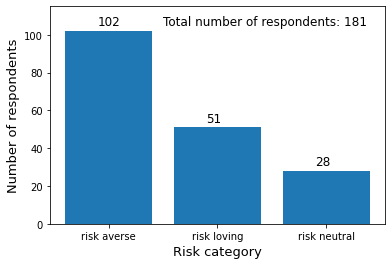

In [8]:
risk_categories_options, occurrence = hf.get_distribution_from_question('risk_category', df_number)

plt.bar(np.arange(1,len(risk_categories_options)+1), occurrence)
plt.ylabel('Number of respondents', fontsize=13)
plt.xlabel('Risk category', fontsize=13)
plt.xticks([1, 2, 3], risk_categories_options)
plt.text(1.5,105,'Total number of respondents: 181', size = 12)
for i in range(1,len(risk_categories_options)+1):
    plt.text(x = i-0.1 , y = occurrence[i-1]+3, s = str(occurrence[i-1]), size = 12)
plt.ylim(0,115)
plt.savefig("Risk_category_distributions.png", dpi=600)

### Plotting the distribution of risk preference across all respondends

In [9]:
risk_preference_options, occurrence = hf.get_distribution_from_question('risk_preference', df_number)

plt.bar(risk_preference_options, occurrence)
for i in range(0,len(risk_preference_options)):
    plt.text(x = risk_preference_options[i]-0.3 , y = occurrence[i]+0.5, s = str(occurrence[i]), size = 12)
plt.ylabel('Number of respondents', fontsize=13)
plt.xlabel('Risk preference',fontsize=13)
plt.ylim(0,31)
plt.savefig("Risk_preference_distributions.png", dpi=600)

## AI familiarity

### Determening AI familiarity category

The AI familiarity category can be determined using Q2. 

In [35]:
for index, row in df_number.iterrows(): 
    if int(row['Q2']) < 4:
        df_number.loc[index,'ai_familiarity'] = 'unfamiliar'
    if int(row['Q2']) == 4:
        df_number.loc[index,'ai_familiarity'] = 'familiar'
    if int(row['Q2']) == 5:
        df_number.loc[index,'ai_familiarity'] = 'very familiar'

### Plotting the distribution of AI familarity accross all participants

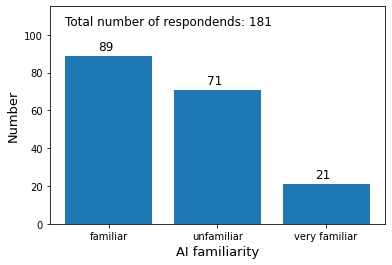

In [36]:
ai_familiarity_options, occurrence = hf.get_distribution_from_question('ai_familiarity', df_number)

plt.bar(np.arange(1,len(ai_familiarity_options)+1), occurrence)
plt.ylabel('Number', fontsize=13)
plt.xlabel('AI familiarity', fontsize=13)
plt.xticks(np.arange(1,len(ai_familiarity_options)+1), ai_familiarity_options)
plt.text(0.6,105,'Total number of respondends: 181', size = 12)
for i in range(1,len(ai_familiarity_options)+1):
    plt.text(x = i-0.1 , y = occurrence[i-1]+3, s = str(occurrence[i-1]), size = 12)
plt.ylim(0,115)
plt.savefig("AI_familiarity_distributions.png", dpi=600)

## Delta between acceptance of human and AI decision

### Determening the  delta between human and AI decision

Substracting the acceptance of AI making the decision from the acceptance of a human making the decision for each respondend (row of the dataframe)

In [12]:
for question in ['Q5','Q6','Q7','Q8','Q9','Q10']:
    for index, row in df_number.iterrows(): 
        df_number.loc[index,question+'_delta'] = df_number.loc[index,question+'_1']-df_number.loc[index,question+'_2']

### Plotting the distribution of the delta value 

The plot groups the respondends by the risk category but also shows a group with all respondends for each question and shows the distribution of the delta for this group.

In [13]:
risk_categories = ['risk loving', 'risk neutral',  'risk adverse', 'all']

fig, axes = plt.subplots(6, 4, sharex=True, sharey=True)
axes[3,0].set(ylabel='Number of respondends')
axes[5,2].set(xlabel='Difference between human and AI option')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axes.flat:
    ax.label_outer()
    
for index1, question in enumerate(['Q5','Q6','Q7','Q8','Q9','Q10']):
    for index2, risk in enumerate(['risk loving', 'risk neutral',  'risk adverse', 'all']):
        axes[0, index2].set_title(risk)
        if risk == 'all':
            data = df_number
        else:
            data = hf.get_subset(df_number, [('risk_category', [risk])])
        
        # calculate distribution for plot
        answer_options, occurrence = hf.get_distribution_from_question(question+'_delta', data)

        axes[index1,index2].bar(answer_options, occurrence, color = 'purple')
        axes[index1,index2].fill([-7,0,0,-7], [0,0,65,65], "r", [0,7,7,0], [0,0,65,65], "b", alpha=0.3) 

fig.savefig("delta_distribution_overview.png", dpi=600)

# Statistics

## Mean and standard deviation

### Calculate the mean and standard deviation for each question for each risk category and all

In [14]:
questions = ['Q5_1','Q5_2','Q5_delta','Q6_1','Q6_2','Q6_delta','Q7_1','Q7_2','Q7_delta',
             'Q8_1','Q8_2','Q8_delta','Q9_1','Q9_2','Q9_delta','Q10_1','Q10_2','Q10_delta']
risk_categories = ['risk loving', 'risk neutral', 'risk averse', 'all']
data_table = {}

for question in questions:
    data_table[question] = {}
    mean_all = []
    std_all = []
    for risk in risk_categories:
        if risk == 'all':
            data = df_number[question]
        else:
            data = hf.get_subset(df_number, [('risk_category', [risk])])[question]
        data_table[question][risk] = {}
        data_table[question][risk]['means'] = np.round(np.mean(data),1)
        data_table[question][risk]['std'] = np.round(np.std(data),1)
        data_table[question][risk]['skew'] = np.round(stats.skew(data),1)
        mean_all.append(np.round(np.mean(data),1))
        std_all.append(np.round(np.std(data),1))
    data_table[question]['all_means'] = mean_all
    data_table[question]['all_std'] = std_all

### Show a table of all the mean and standard deviation

The table shows the results for each risk category and for all respondends. The all_means and all_std row is containing the values for the different risk groups and all respondends in an array for plotting.

In [15]:
df_data_table = pd.DataFrame(data_table)
df_data_table

Q5_1  \
risk loving   {'means': 5.9, 'std': 0.8, 'skew': -0.4}   
risk neutral  {'means': 5.6, 'std': 1.0, 'skew': -0.9}   
risk averse   {'means': 5.7, 'std': 1.1, 'skew': -1.1}   
all           {'means': 5.8, 'std': 1.0, 'skew': -1.0}   
all_means                         [5.9, 5.6, 5.7, 5.8]   
all_std                           [0.8, 1.0, 1.1, 1.0]   

                                                  Q5_2  \
risk loving   {'means': 5.3, 'std': 1.4, 'skew': -0.6}   
risk neutral  {'means': 4.8, 'std': 1.5, 'skew': -0.8}   
risk averse   {'means': 5.0, 'std': 1.3, 'skew': -1.1}   
all           {'means': 5.1, 'std': 1.3, 'skew': -0.9}   
all_means                         [5.3, 4.8, 5.0, 5.1]   
all_std                           [1.4, 1.5, 1.3, 1.3]   

                                             Q5_delta  \
risk loving   {'means': 0.6, 'std': 1.4, 'skew': 1.0}   
risk neutral  {'means': 0.8, 'std': 1.3, 'skew': 0.5}   
risk averse   {'means': 0.7, 'std': 1.6, 'skew': 0.3}   
all           {'means': 0.7, 'std': 1.5, 'skew': 0.5}   
all_means                        [0.6, 0.8, 0.7, 0.7]   
all_std                          [1.4, 1.3, 1.6, 1.5]   

                                                  Q6_1  \
risk loving   {'means': 5.8, 'std': 1.3, 'skew': -1.2}   
risk neutral  {'means': 5.9, 'std': 1.2, 'skew': -1.7}   
risk averse   {'means': 6.0, 'std': 1.3, 'skew': -1.7}   
all           {'means': 5.9, 'std': 1.3, 'skew': -1.5}   
all_means                         [5.8, 5.9, 6.0, 5.9]   
all_std                           [1.3, 1.2, 1.3, 1.3]   

                                                  Q6_2  \
risk loving   {'means': 4.9, 'std': 1.6, 'skew': -0.4}   
risk neutral  {'means': 4.4, 'std': 1.6, 'skew': -0.4}   
risk averse   {'means': 4.5, 'std': 1.8, 'skew': -0.5}   
all           {'means': 4.6, 'std': 1.7, 'skew': -0.4}   
all_means                         [4.9, 4.4, 4.5, 4.6]   
all_std                           [1.6, 1.6, 1.8, 1.7]   

                                              Q6_delta  \
risk loving   {'means': 0.9, 'std': 2.3, 'skew': -0.4}   
risk neutral  {'means': 1.5, 'std': 2.5, 'skew': -0.6}   
risk averse    {'means': 1.5, 'std': 2.1, 'skew': 0.1}   
all           {'means': 1.3, 'std': 2.2, 'skew': -0.2}   
all_means                         [0.9, 1.5, 1.5, 1.3]   
all_std                           [2.3, 2.5, 2.1, 2.2]   

                                                  Q7_1  \
risk loving   {'means': 5.7, 'std': 1.3, 'skew': -1.4}   
risk neutral  {'means': 5.3, 'std': 1.5, 'skew': -1.2}   
risk averse   {'means': 5.6, 'std': 1.3, 'skew': -1.3}   
all           {'means': 5.6, 'std': 1.3, 'skew': -1.3}   
all_means                         [5.7, 5.3, 5.6, 5.6]   
all_std                           [1.3, 1.5, 1.3, 1.3]   

                                                  Q7_2  \
risk loving   {'means': 5.5, 'std': 1.6, 'skew': -1.0}   
risk neutral  {'means': 5.3, 'std': 1.6, 'skew': -1.2}   
risk averse   {'means': 5.3, 'std': 1.6, 'skew': -1.1}   
all           {'means': 5.3, 'std': 1.6, 'skew': -1.1}   
all_means                         [5.5, 5.3, 5.3, 5.3]   
all_std                           [1.6, 1.6, 1.6, 1.6]   

                                             Q7_delta  \
risk loving   {'means': 0.3, 'std': 2.2, 'skew': 0.2}   
risk neutral  {'means': 0.0, 'std': 2.0, 'skew': 0.6}   
risk averse   {'means': 0.4, 'std': 2.1, 'skew': 0.1}   
all           {'means': 0.3, 'std': 2.2, 'skew': 0.2}   
all_means                        [0.3, 0.0, 0.4, 0.3]   
all_std                          [2.2, 2.0, 2.1, 2.2]   

                                                  Q8_1  \
risk loving   {'means': 6.0, 'std': 1.1, 'skew': -1.8}   
risk neutral  {'means': 6.0, 'std': 1.1, 'skew': -1.1}   
risk averse   {'means': 6.0, 'std': 1.1, 'skew': -1.3}   
all           {'means': 6.0, 'std': 1.1, 'skew': -1.4}   
all_means                         [6.0, 6.0, 6.0, 6.0]   
all_std                           [1.1, 1.1, 1.1, 1.1

## p and T value between distributions

### Calculate the p and t value between distributions

For each question and each risk category and all respondends the distribution for the acceptance of the human making the decision an dthe acceptance of the AI making the decision is calculated.

In [16]:
questions = ['Q5','Q6','Q7','Q8','Q9','Q10']
risk_categories = ['risk loving', 'risk neutral', 'risk averse', 'all']
statistics = {}

for index1, question in enumerate(questions):
    statistics[question] = {}
    for index2, risk in enumerate(risk_categories):
        if risk == 'all':
            data = df_number
        else:
            data = hf.get_subset(df_number, [('risk_category', [risk])])
        # calculate stats
        t_stat, p_val = stats.ttest_ind(data[question+'_1'], data[question+'_2'], equal_var=False)
        statistics[question][risk] = {}
        statistics[question][risk]['t_stat'] = np.round(t_stat,2)
        statistics[question][risk]['p_val'] = np.round(p_val,3)

### Show the p and T value in a table

In [17]:
df_statistics = pd.DataFrame(statistics)
df_statistics

Q5  \
risk loving   {'t_stat': 2.92, 'p_val': 0.005}   
risk neutral  {'t_stat': 2.19, 'p_val': 0.034}   
risk averse     {'t_stat': 4.01, 'p_val': 0.0}   
all              {'t_stat': 5.4, 'p_val': 0.0}   

                                            Q6  \
risk loving   {'t_stat': 3.12, 'p_val': 0.002}   
risk neutral    {'t_stat': 3.83, 'p_val': 0.0}   
risk averse     {'t_stat': 6.69, 'p_val': 0.0}   
all             {'t_stat': 8.21, 'p_val': 0.0}   

                                            Q7  \
risk loving   {'t_stat': 0.88, 'p_val': 0.382}   
risk neutral     {'t_stat': 0.0, 'p_val': 1.0}   
risk averse    {'t_stat': 1.9, 'p_val': 0.059}   
all           {'t_stat': 1.88, 'p_val': 0.061}   

                                           Q8  \
risk loving    {'t_stat': 5.31, 'p_val': 0.0}   
risk neutral   {'t_stat': 4.36, 'p_val': 0.0}   
risk averse    {'t_stat': 8.07, 'p_val': 0.0}   
all           {'t_stat': 10.63, 'p_val': 0.0}   

                                            Q9  \
risk loving   {'t_stat': 0.39, 'p_val': 0.698}   
risk neutral  {'t_stat': -0.2, 'p_val': 0.845}   
risk averse   {'t_stat': 2.38, 'p_val': 0.018}   
all           {'t_stat': 1.82, 'p_val': 0.069}   

                                           Q10  
risk loving     {'t_stat': 4.37, 'p_val': 0.0}  
risk neutral  {'t_stat': 2.87, 'p_val': 0.006}  
risk averse     {'t_stat': 7.75, 'p_val': 0.0}  
all             {'t_stat': 9.29, 'p_val': 0.0}

# Creating plots of the responses

## Comparing distributions of the Human and AI acceptance 

Comparing the distributions for the questions 5_1 to 5_2, ... 10_1 to 10_2 for each risk category and all

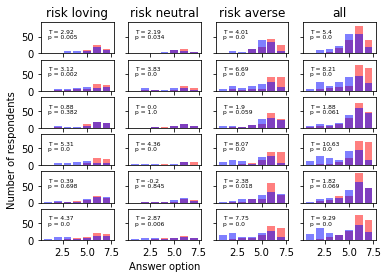

In [18]:
risk_categories = ['risk loving', 'risk neutral',  'risk averse', 'all']

fig, axes = plt.subplots(6, 4, sharex=True, sharey=True)
axes[3,0].set(ylabel='Number of respondents')
axes[5,1].set(xlabel='Answer option')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axes.flat:
    ax.label_outer()
    
for index1, question in enumerate(['Q5','Q6','Q7','Q8','Q9','Q10']):
    for index2, risk in enumerate(risk_categories):
        axes[0, index2].set_title(risk)
        
        if risk == 'all':
            data = df_number
        else:
            data = hf.get_subset(df_number, [('risk_category', [risk])])
        
        # calculate distribution for plot
        answer_options_1, occurrence_1 = hf.get_distribution_from_question(question+'_1', data)
        answer_options_2, occurrence_2 = hf.get_distribution_from_question(question+'_2', data)

        axes[index1,index2].bar(answer_options_1, occurrence_1, label='human', color = 'red', alpha=0.5)
        axes[index1,index2].bar(answer_options_2, occurrence_2, label='ai', color = 'blue', alpha=0.5)
        axes[index1, index2].text(1, 60 , f"T = {statistics[question][risk]['t_stat']}", fontsize=6)
        axes[index1, index2].text(1, 45 , f"p = {statistics[question][risk]['p_val']}", fontsize=6)

fig.savefig("answer_distribution_overview.png", dpi=600)

## Plotting the mean with standard deviation

### For each question _1 and _2 

To compare the acceptance for humans and AI making the decision the meand and std deviation are plotted for both options of each question and each risk category and all respondends.

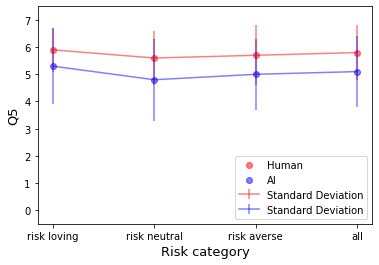

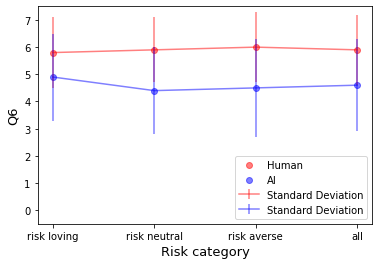

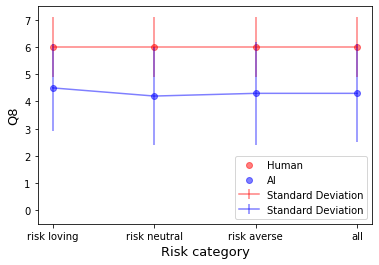

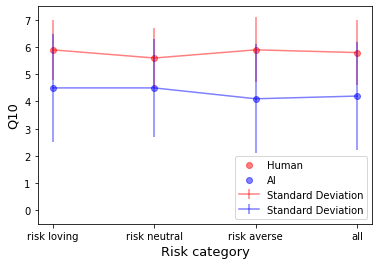

<Figure size 432x288 with 0 Axes>

In [19]:
questions = ['Q5','Q6','Q7','Q8','Q9','Q10']
risk_categories = ['risk loving', 'risk neutral', 'risk averse', 'all']

for question in questions:
    plt.scatter([1,2,3,4], data_table[question+'_1']['all_means'], label = 'Human', color = 'red',alpha=0.5)
    plt.errorbar([1,2,3,4], data_table[question+'_1']['all_means'], yerr=data_table[question+'_1']['all_std'], label = 'Standard Deviation',  color = 'red',alpha=0.5)
    plt.scatter([1,2,3,4], data_table[question+'_2']['all_means'], label = 'AI',  color = 'blue',alpha=0.5)
    plt.errorbar([1,2,3,4], data_table[question+'_2']['all_means'], yerr=data_table[question+'_2']['all_std'], label = 'Standard Deviation', color = 'blue',alpha=0.5)
    plt.ylim(-0.5,7.5)
    plt.xticks([1, 2, 3,4], risk_categories)
    plt.legend(loc='lower right')
    plt.ylabel(question, fontsize=13)
    plt.xlabel('Risk category', fontsize=13)
    plt.xticks([1, 2, 3,4], ['risk loving', 'risk neutral',  'risk averse', 'all'])
    plt.savefig(question+"_mean.png", dpi=600)
    plt.show()
    plt.clf()

### For the delta

To see the differenc between human and AI decisions the delta is plotted for each question and each risk category and all respondends.

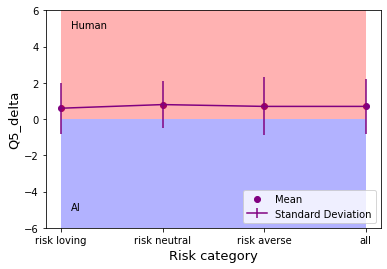

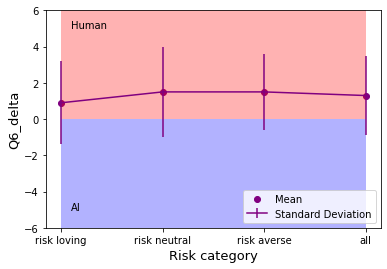

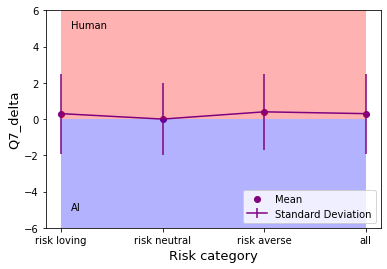

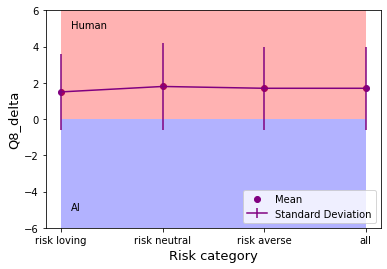

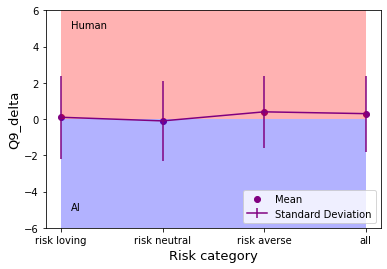

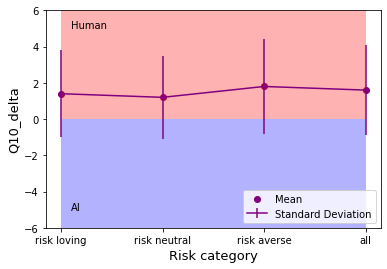

<Figure size 432x288 with 0 Axes>

In [20]:
for question in ['Q5_delta','Q6_delta','Q7_delta','Q8_delta','Q9_delta','Q10_delta']:
    plt.scatter([1,2,3,4], data_table[question]['all_means'], label = 'Mean', color = 'purple')
    plt.errorbar([1,2,3,4], data_table[question]['all_means'], yerr=data_table[question]['all_std'], label = 'Standard Deviation', color='purple')
    plt.ylim(-6,6)
    plt.xticks([1, 2, 3,4], risk_categories)
    plt.legend(loc='lower right')
    plt.ylabel(question, fontsize=13)
    plt.xlabel('Risk category', fontsize=13)
    plt.fill([1,1,4,4], [0,6,6,0], "r", [1,1,4,4], [0,-6,-6,0], "b", alpha=0.3) 
    plt.text(1.1,5, 'Human')
    plt.text(1.1,-5, 'AI')
    plt.savefig(question+"_mean_delta.png", dpi=600)
    plt.show()
    plt.clf()

## Plotting correlations with line of best fit

### Risk preference

To see if there is a correlation between the risk preference and the acceptance of human or AI decision making.

#### Heat map

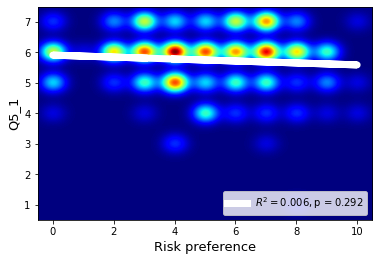

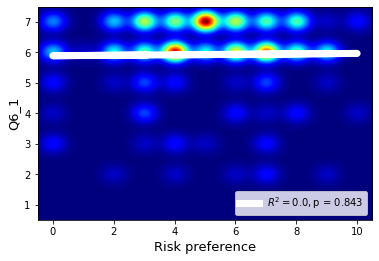

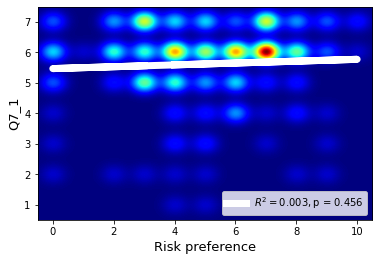

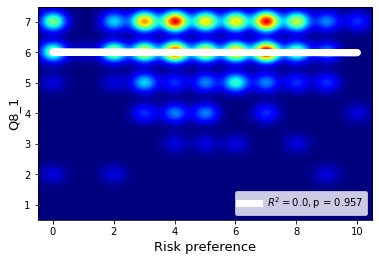

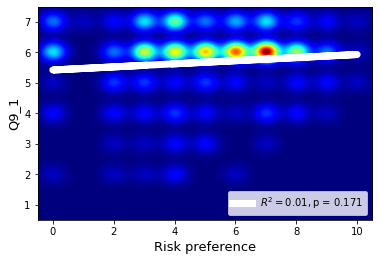

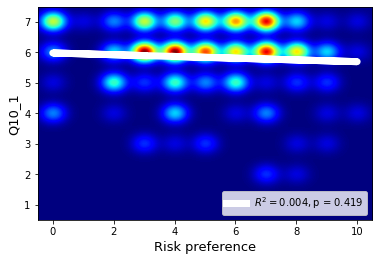

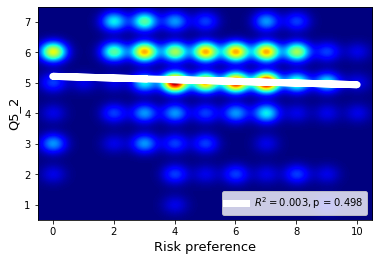

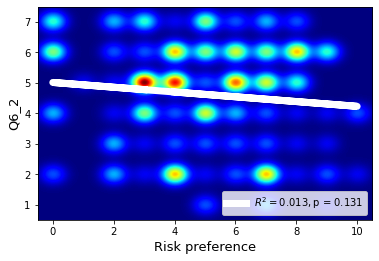

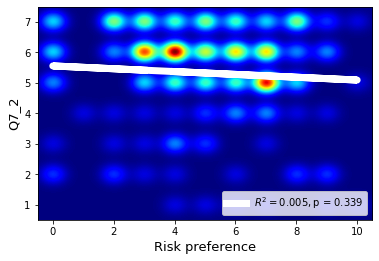

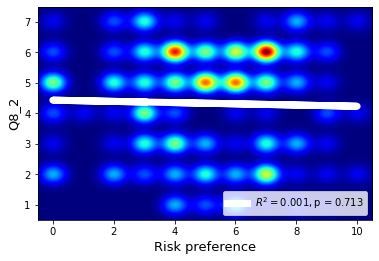

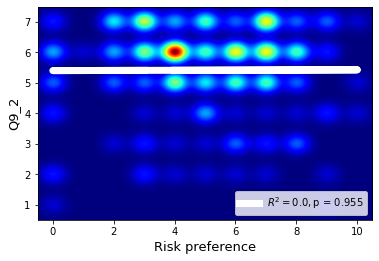

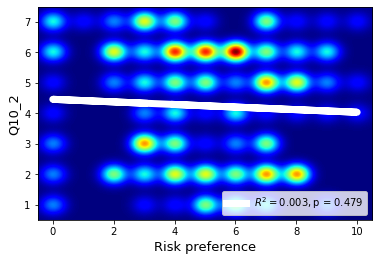

<Figure size 432x288 with 0 Axes>

In [21]:
for question in ['Q5_1' ,'Q6_1','Q7_1','Q8_1','Q9_1','Q10_1','Q5_2','Q6_2','Q7_2','Q8_2','Q9_2','Q10_2']:
    x = df_number['risk_preference']
    y = df_number[question]
    
    # linear regression
    fit = stats.linregress(x, y)    
    plt.plot(x,fit.intercept + fit.slope*x,label=f'$R^2 = {np.round(fit.rvalue**2,3)},$p = {np.round(fit.pvalue,3)}', color='white', linewidth=7.0)
    
    # get heatmap, add values to extend the graph (visual only)
    y = np.concatenate([df_number[question],[-0.9,7.9]])
    x = np.concatenate([df_number['risk_preference'],[-0.9,10.9]])
    img, extent = hf.heatmap(x, y, s=25)
    plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet)

    plt.ylim(0.5,7.5)
    plt.xlim(-0.5,10.5)
    plt.legend(loc='lower right')
    plt.ylabel(question, fontsize=13)
    plt.xlabel('Risk preference', fontsize=13)
    plt.savefig(question+"_risk_fit.png", dpi=600)
    plt.show()
    plt.clf()

#### Jitter

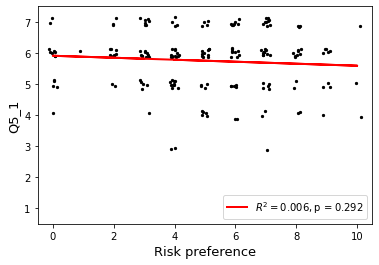

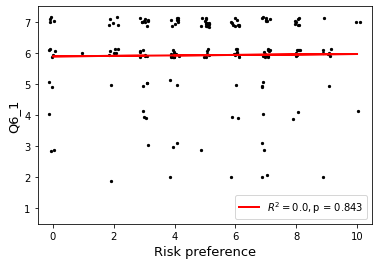

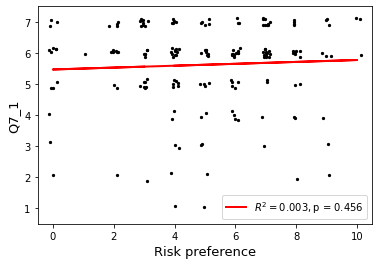

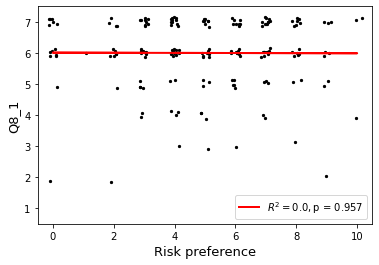

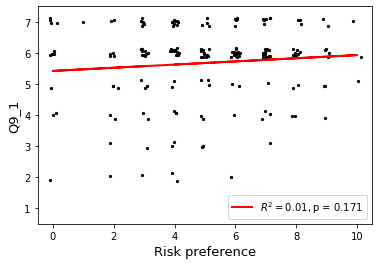

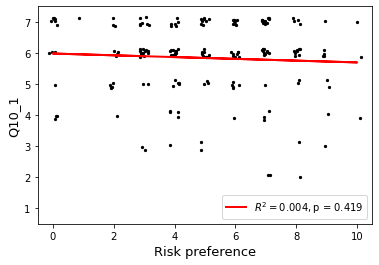

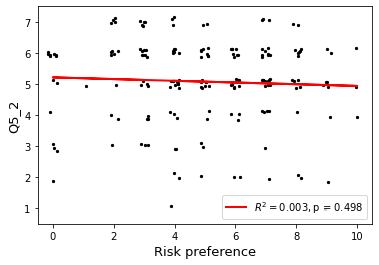

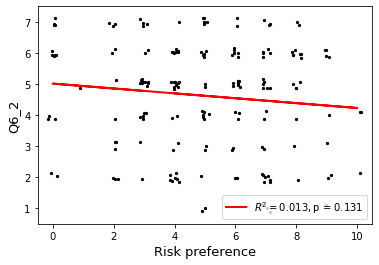

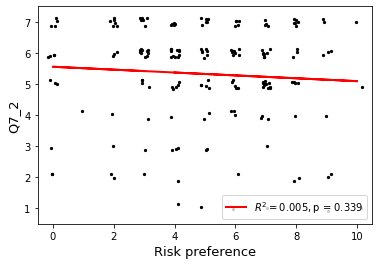

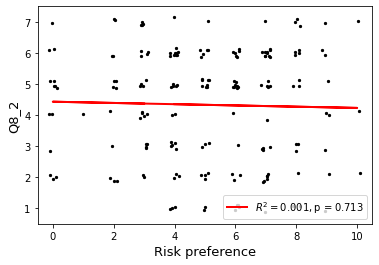

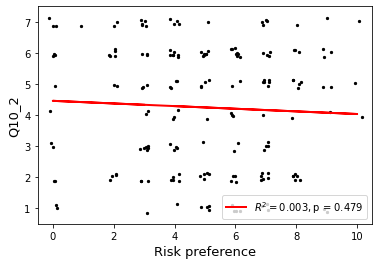

<Figure size 432x288 with 0 Axes>

In [22]:
for question in ['Q5_1','Q6_1','Q7_1','Q8_1','Q9_1','Q10_1','Q5_2','Q6_2','Q7_2','Q8_2','Q9_2','Q10_2']:
    x = np.asarray(df_number['risk_preference'])
    y = np.asarray(df_number[question])

    # linear regression
    fit = stats.linregress(x, y)    
    plt.plot(x,fit.intercept + fit.slope*x,label=f'$R^2 = {np.round(fit.rvalue**2,3)},$p = {np.round(fit.pvalue,3)}', color='red', linewidth=2.0)
    
    x,y = hf.addjitter(x,y,0.3)
    plt.scatter(x,y,s=5, color='black')

    plt.ylim(0.5,7.5)
    plt.xlim(-0.5,10.5)
    plt.legend(loc='lower right')
    plt.ylabel(question, fontsize=13)
    plt.xlabel('Risk preference', fontsize=13)
    plt.savefig(question+"_risk_jitter_fit.png", dpi=600)
    plt.show()
    plt.clf()

#### All questions combined

##### Heat map

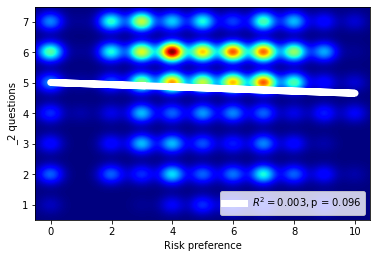

<Figure size 432x288 with 0 Axes>

In [23]:
all_2 =[]
all_risk = []
for question in ['Q5_2','Q6_2','Q7_2','Q8_2','Q9_2','Q10_2']:
    all_2 = np.concatenate([all_2,df_number[question]])
    all_risk = np.concatenate([all_risk,df_number['risk_preference']])
x = all_risk
y = all_2

# linear regression
fit = stats.linregress(x, y)    
plt.plot(x,fit.intercept + fit.slope*x,label=f'$R^2 = {np.round(fit.rvalue**2,3)},$p = {np.round(fit.pvalue,3)}', color='white', linewidth=7.0)

# get heatmap, add values to extend the graph (visual only)
y = np.concatenate([all_2,[-0.9,7.9]])
x = np.concatenate([all_risk,[-0.9,10.9]])
img, extent = hf.heatmap(x, y, s=25)
plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet)

plt.ylim(0.5,7.5)
plt.xlim(-0.5,10.5)
plt.legend(loc='lower right')
plt.ylabel('_2 questions')
plt.xlabel('Risk preference')
plt.savefig("all_risk_fit.png", dpi=600)
plt.show()
plt.clf()

##### Jitter

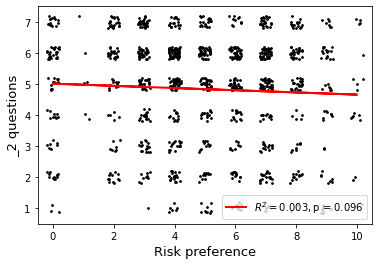

<Figure size 432x288 with 0 Axes>

In [24]:
all_2 =[]
all_risk = []
for question in ['Q5_2','Q6_2','Q7_2','Q8_2','Q9_2','Q10_2']:
    all_2 = np.concatenate([all_2,df_number[question]])
    all_risk = np.concatenate([all_risk,df_number['risk_preference']])
x = all_risk
y = all_2

# linear regression
fit = stats.linregress(x, y)    
plt.plot(x,fit.intercept + fit.slope*x,label=f'$R^2 = {np.round(fit.rvalue**2,3)},$p = {np.round(fit.pvalue,3)}', color='red', linewidth=2.0)
    
x,y = hf.addjitter(x,y,0.4)
plt.scatter(x,y,s=3, color='black')

plt.ylim(0.5,7.5)
plt.xlim(-0.5,10.5)
plt.legend(loc='lower right')
plt.ylabel('_2 questions', fontsize= 13)
plt.xlabel('Risk preference', fontsize=13)
plt.savefig("all_risk_jitter_fit.png", dpi=600)
plt.show()
plt.clf()

### Utaut

To see if there is a correlation between the acceptance of technology and the acceptance of human or AI decision making.

#### Heat map

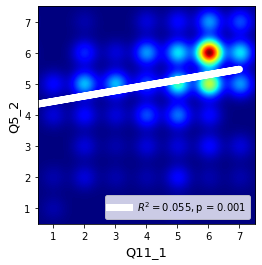

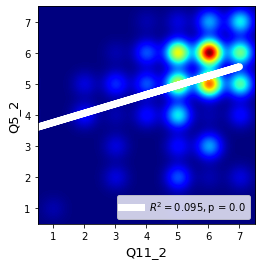

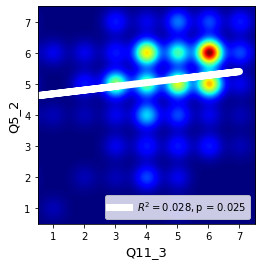

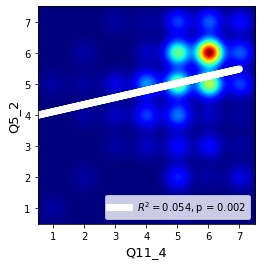

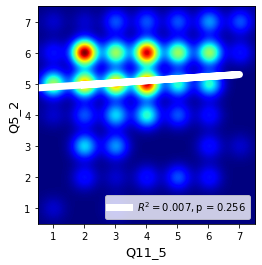

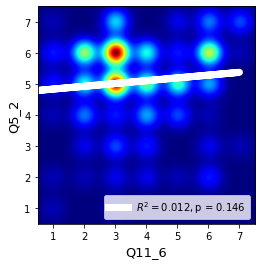

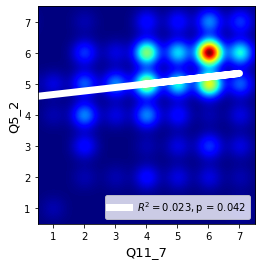

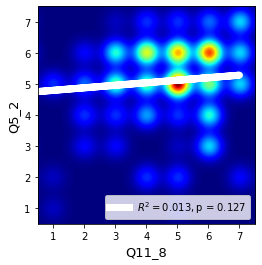

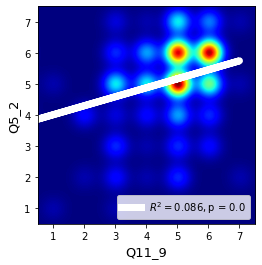

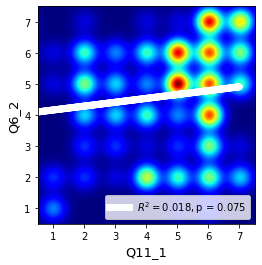

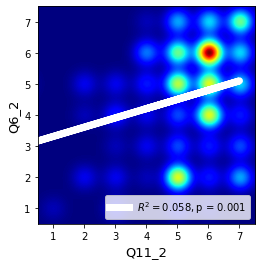

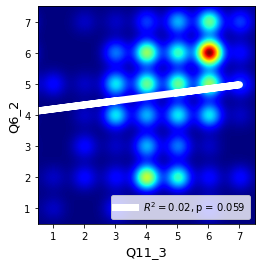

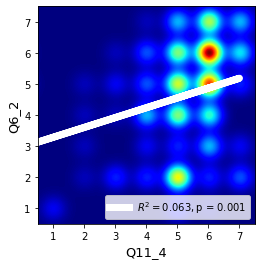

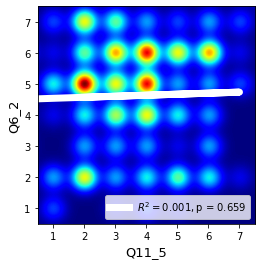

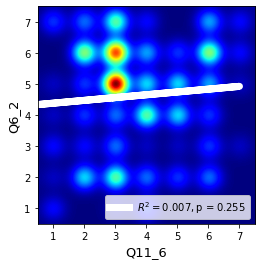

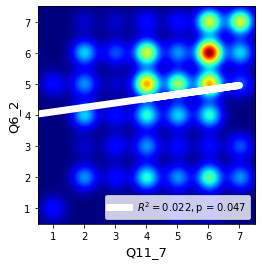

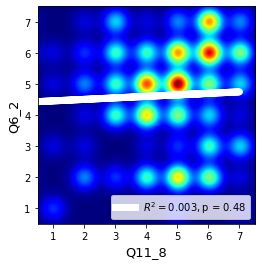

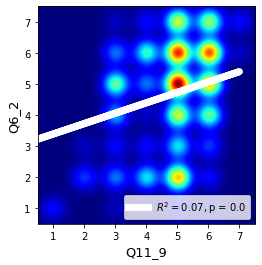

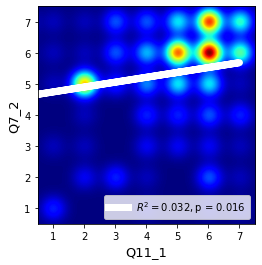

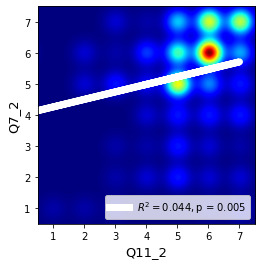

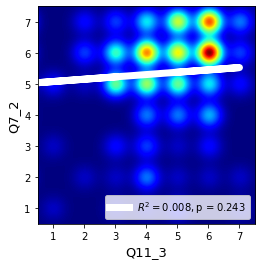

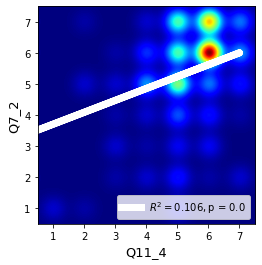

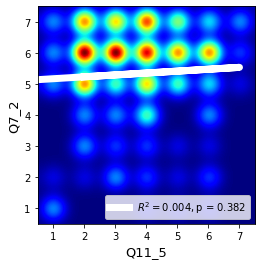

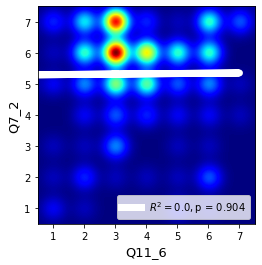

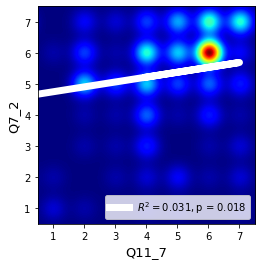

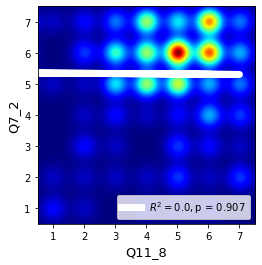

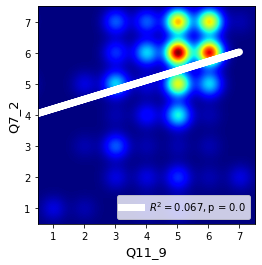

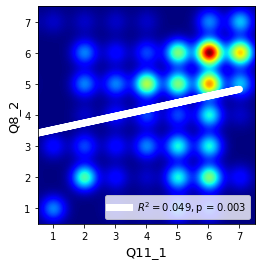

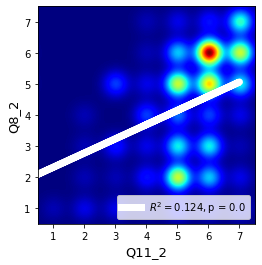

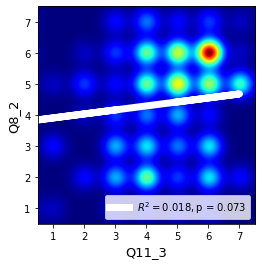

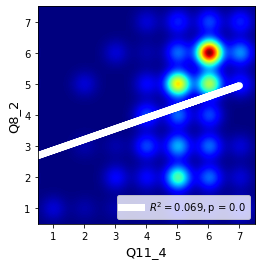

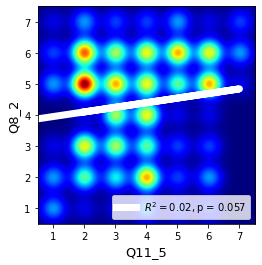

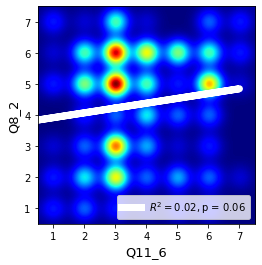

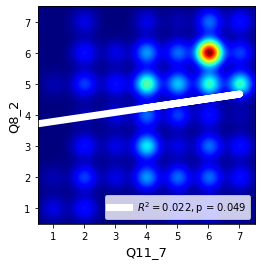

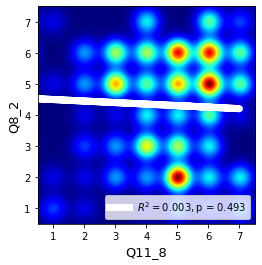

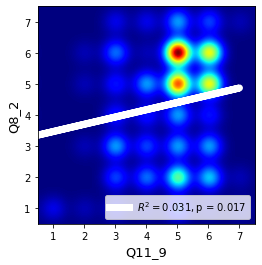

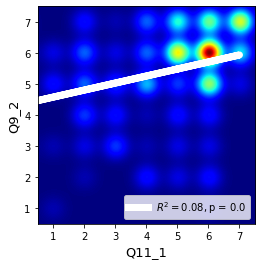

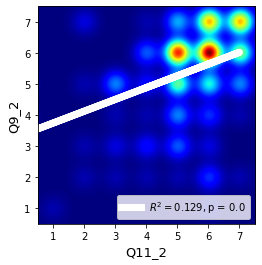

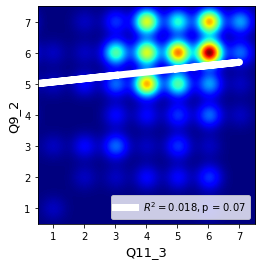

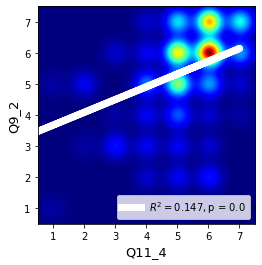

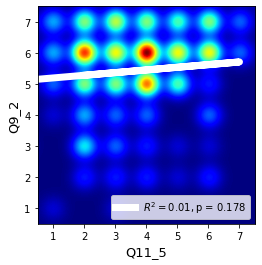

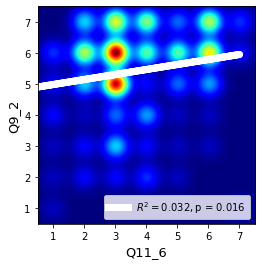

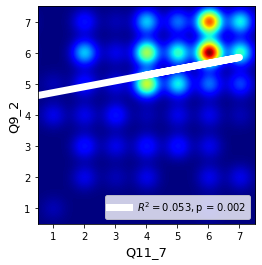

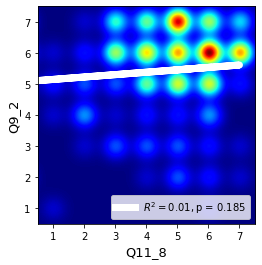

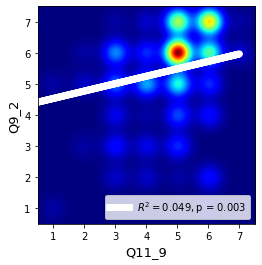

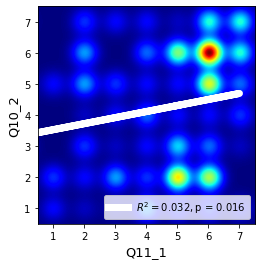

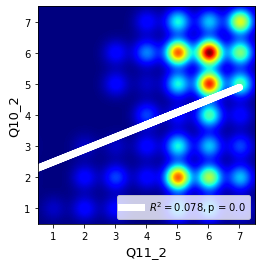

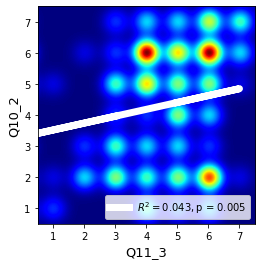

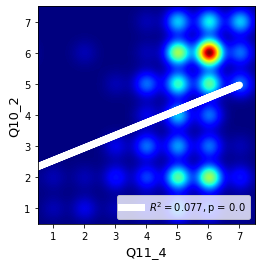

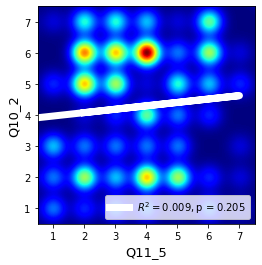

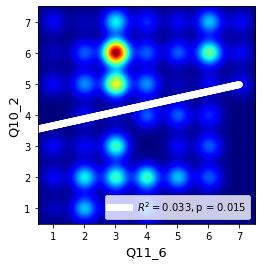

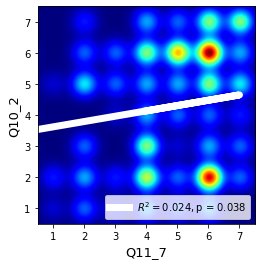

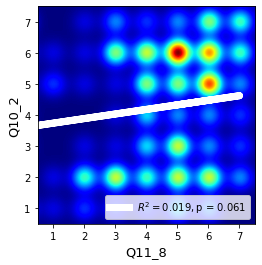

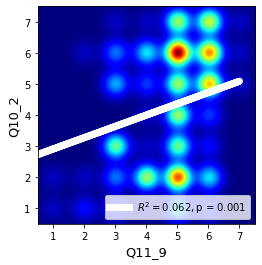

<Figure size 432x288 with 0 Axes>

In [25]:
for question in ['Q5_2','Q6_2','Q7_2','Q8_2','Q9_2','Q10_2']:
    for utaut in ['Q11_1' ,'Q11_2','Q11_3','Q11_4','Q11_5','Q11_6','Q11_7','Q11_8','Q11_9']:
        x = df_number[utaut]
        y = df_number[question]
        
        # linear regression
        fit = stats.linregress(x, y)    
        plt.plot(x,fit.intercept + fit.slope*x,label=f'$R^2 = {np.round(fit.rvalue**2,3)},$p = {np.round(fit.pvalue,3)}', color='white', linewidth=7.0)
    
        # get heatmap, add values to extend the graph (visual only)
        y = np.concatenate([df_number[question],[-0.9,7.9]])
        x = np.concatenate([df_number[utaut],[-0.9,7.9]])
        img, extent = hf.heatmap(x, y, s=32)
        plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet)

        plt.ylim(0.5,7.5)
        plt.xlim(0.5,7.5)
        plt.legend(loc='lower right')
        plt.ylabel(question, fontsize=13)
        plt.xlabel(utaut, fontsize=13)

        plt.savefig(question+utaut+"_fit.png", dpi=600)
        plt.show()
        plt.clf()

#### Jitter

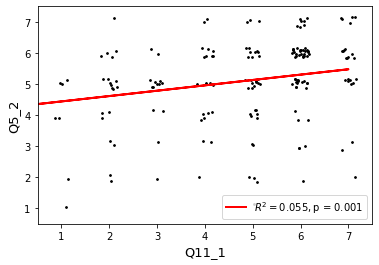

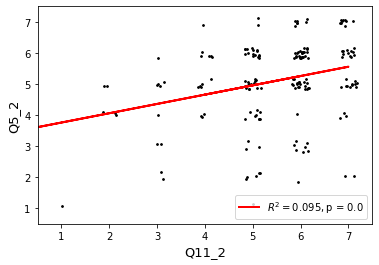

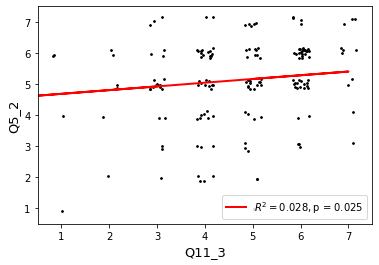

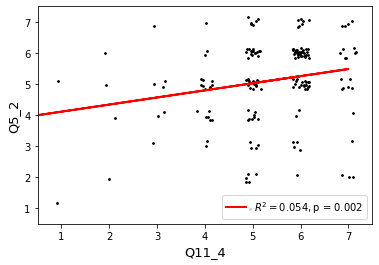

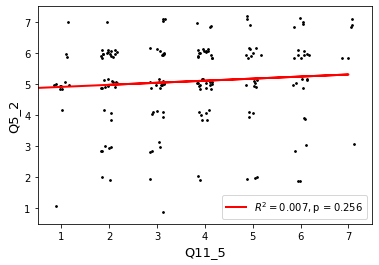

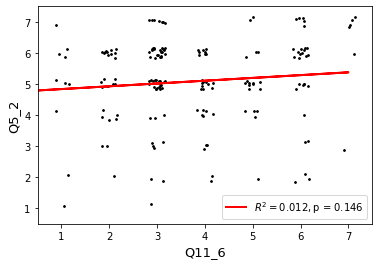

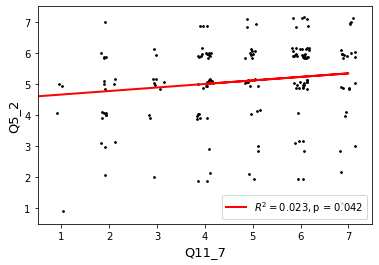

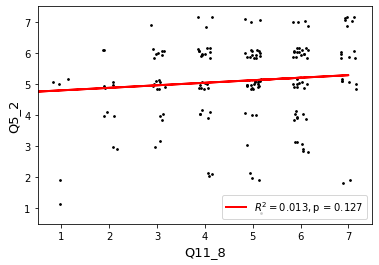

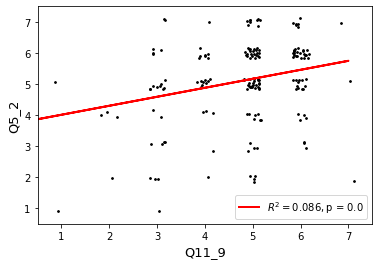

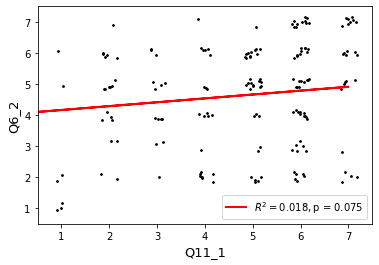

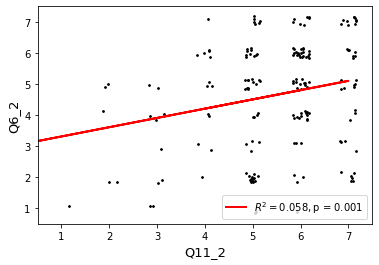

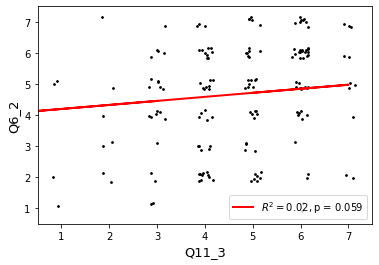

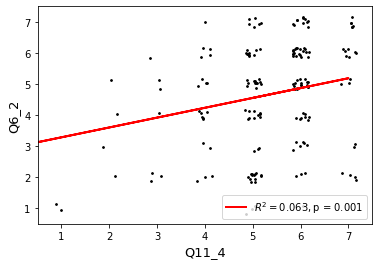

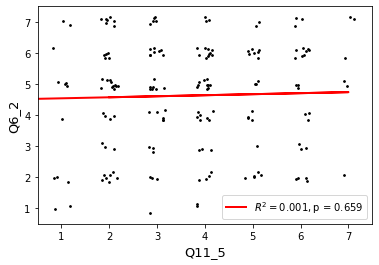

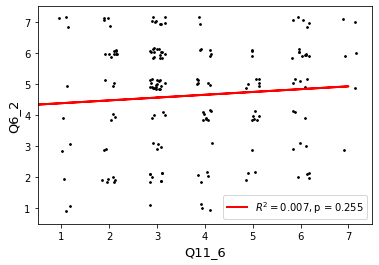

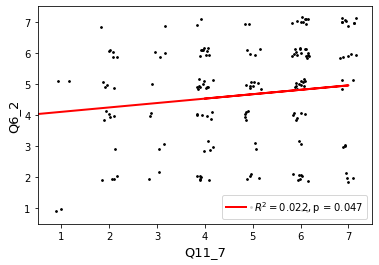

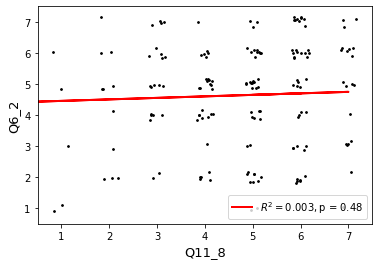

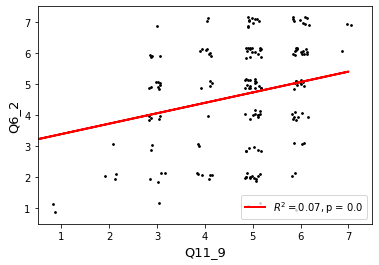

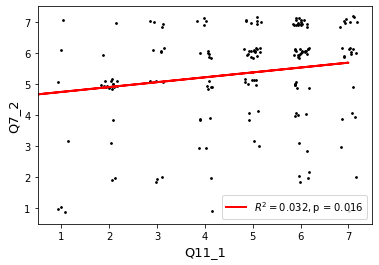

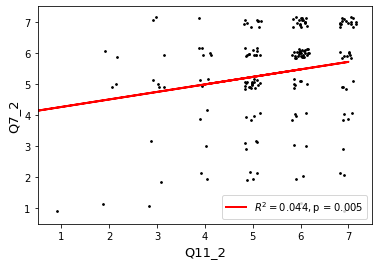

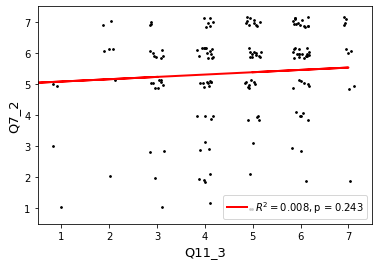

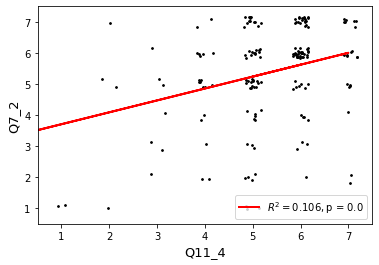

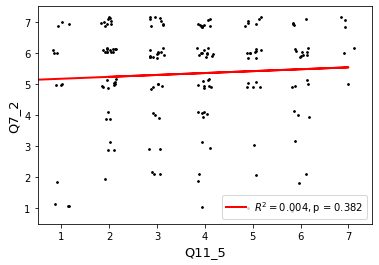

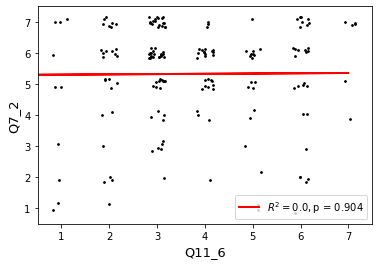

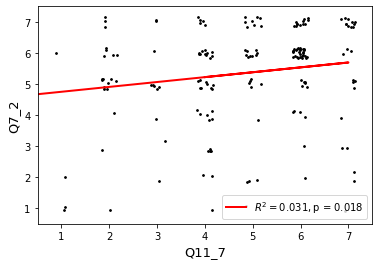

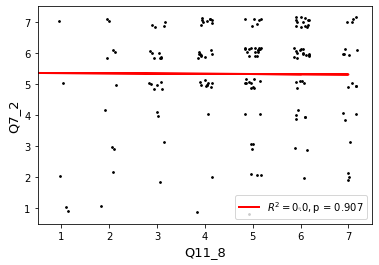

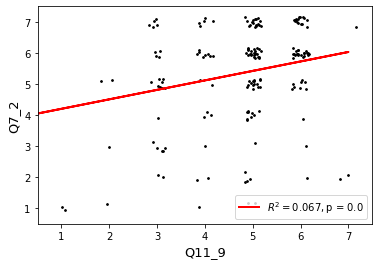

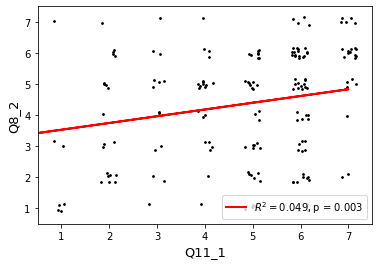

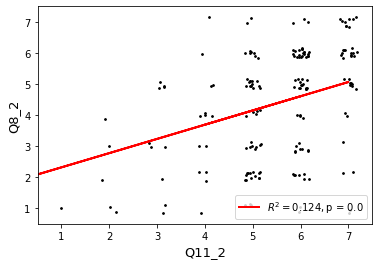

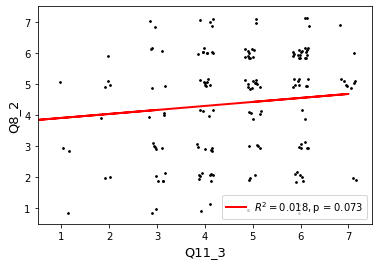

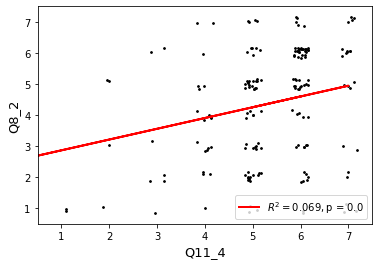

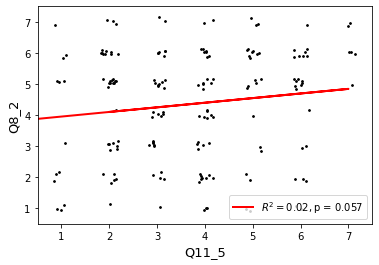

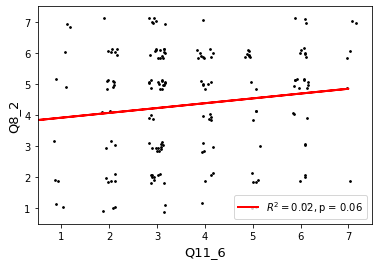

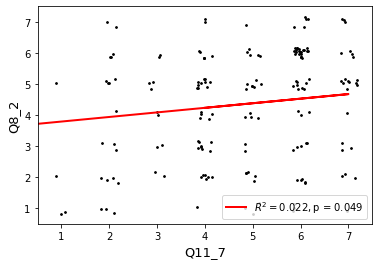

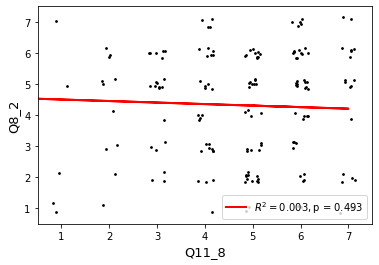

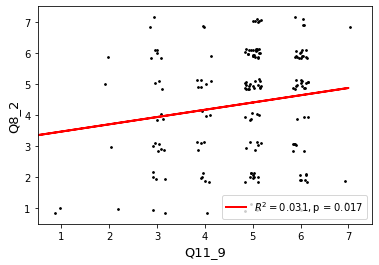

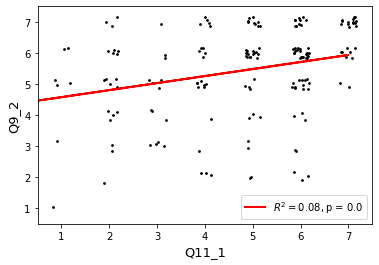

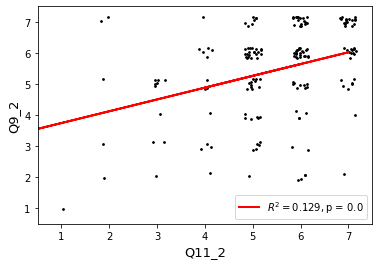

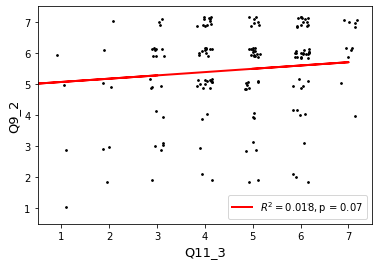

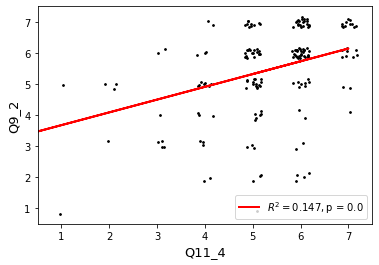

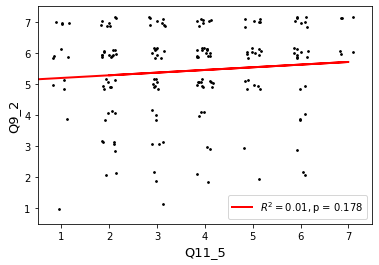

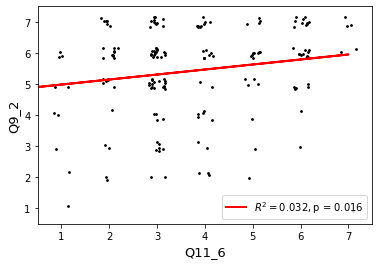

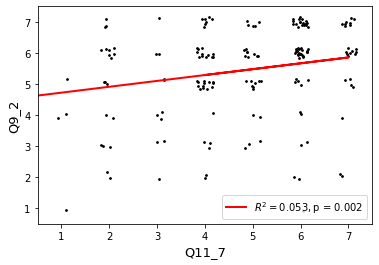

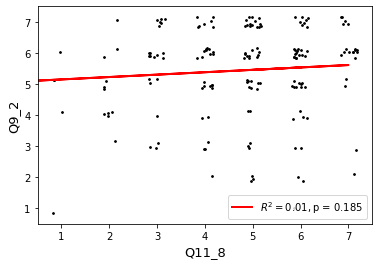

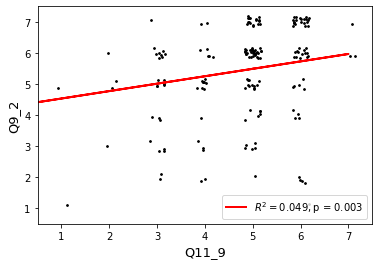

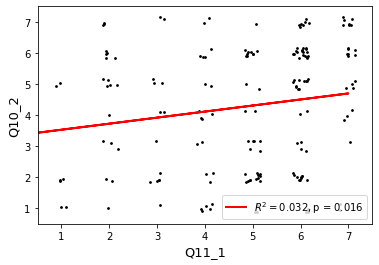

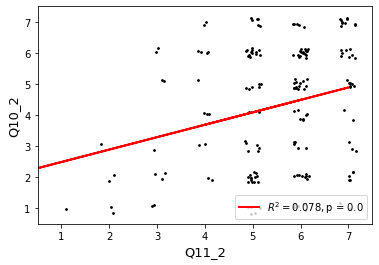

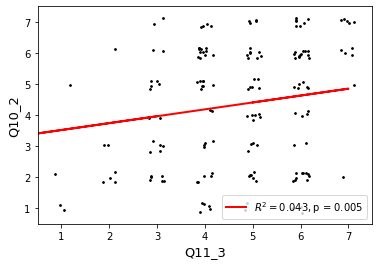

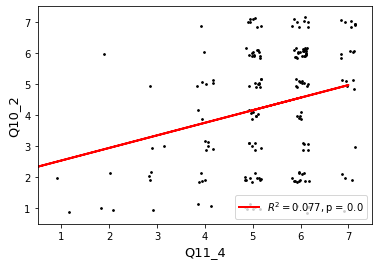

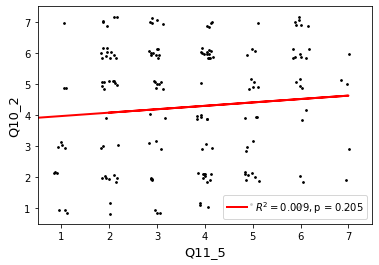

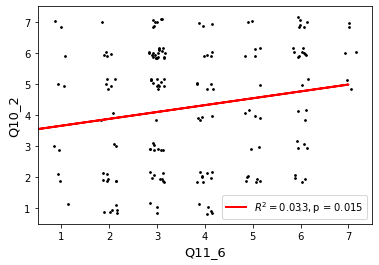

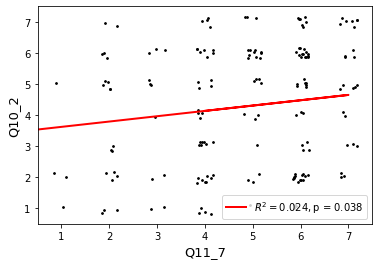

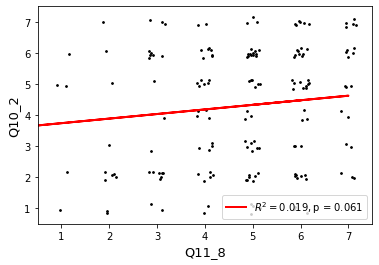

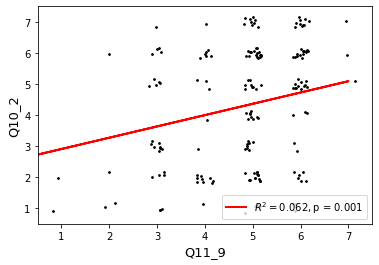

<Figure size 432x288 with 0 Axes>

In [26]:
for question in ['Q5_2','Q6_2','Q7_2','Q8_2','Q9_2','Q10_2']:
    for utaut in ['Q11_1','Q11_2','Q11_3','Q11_4','Q11_5','Q11_6','Q11_7','Q11_8','Q11_9']:
        x = np.asarray(df_number[utaut])
        y = np.asarray(df_number[question])
            
        # linear regression
        fit = stats.linregress(x, y)    
        plt.plot(x,fit.intercept + fit.slope*x,label=f'$R^2 = {np.round(fit.rvalue**2,3)},$p = {np.round(fit.pvalue,3)}', color='red', linewidth=2.0)
    
        x,y = hf.addjitter(x,y,0.35)
        plt.scatter(x,y,s=3, color='black')
        
        plt.ylim(0.5,7.5)
        plt.xlim(0.5,7.5)
        plt.legend(loc='lower right')
        plt.ylabel(question, fontsize=13)
        plt.xlabel(utaut, fontsize=13)
        plt.savefig(question+utaut+"_jitter_fit.png", dpi=600)
        plt.show()
        plt.clf()

#### All questions combined

##### Heat map

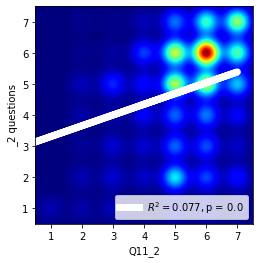

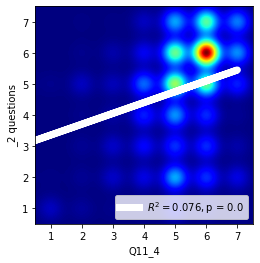

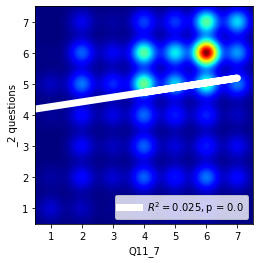

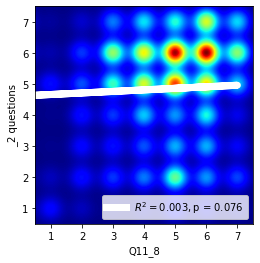

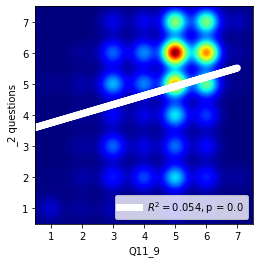

<Figure size 432x288 with 0 Axes>

In [27]:
utaut_all = {}
for utaut in ['Q11_1' ,'Q11_2','Q11_3','Q11_4','Q11_5','Q11_6','Q11_7','Q11_8','Q11_9']:
    utaut_all_list = []
    all_2 = []
    for question in ['Q5_2','Q6_2','Q7_2','Q8_2','Q9_2','Q10_2']:
        all_2 = np.concatenate([all_2, df_number[question]])
        utaut_all_list = np.concatenate([utaut_all_list,df_number[utaut]])
    utaut_all[utaut] = utaut_all_list
    
for utaut in ['Q11_1' ,'Q11_2','Q11_3','Q11_4','Q11_5','Q11_6','Q11_7','Q11_8','Q11_9']:
    x = utaut_all[utaut]
    y = all_2
    
    # linear regression
    fit = stats.linregress(x, y)    
    plt.plot(x,fit.intercept + fit.slope*x,label=f'$R^2 = {np.round(fit.rvalue**2,3)},$p = {np.round(fit.pvalue,3)}', color='white', linewidth=7.0)
    
    # get heatmap, add values to extend the graph (visual only)
    y = np.concatenate([all_2,[-0.9,7.9]])
    x = np.concatenate([utaut_all[utaut],[-0.9,7.9]])
    img, extent = hf.heatmap(x, y, s=32)
    plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet)

    plt.ylim(0.5,7.5)
    plt.xlim(0.5,7.5)
    plt.legend(loc='lower right')
    plt.ylabel('_2 questions')
    plt.xlabel(utaut)
    plt.savefig('all'+utaut+"_fit.png", dpi=600)
    plt.show()
    plt.clf()

##### Jitter

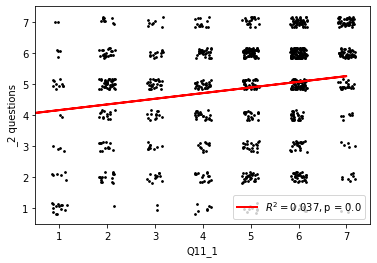

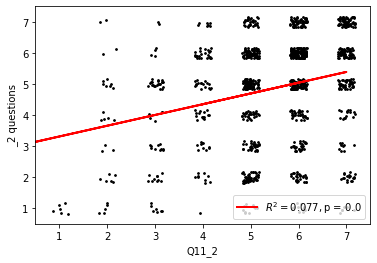

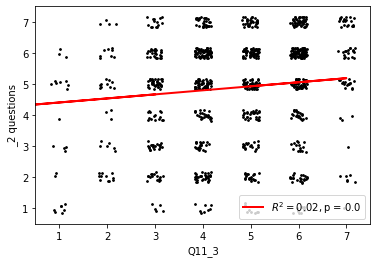

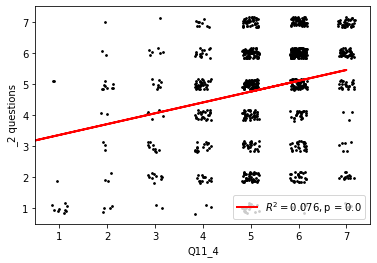

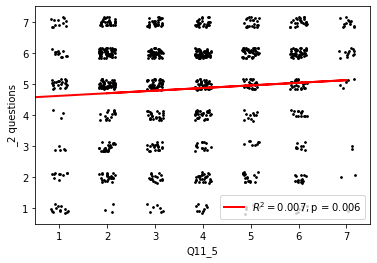

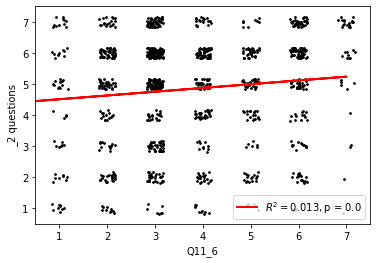

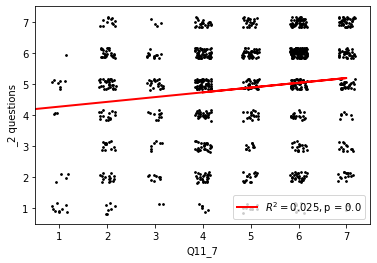

<Figure size 432x288 with 0 Axes>

In [28]:
utaut_all = {}
for utaut in ['Q11_1' ,'Q11_2','Q11_3','Q11_4','Q11_5','Q11_6','Q11_7','Q11_8','Q11_9']:
    utaut_all_list = []
    all_2 = []
    for question in ['Q5_2','Q6_2','Q7_2','Q8_2','Q9_2','Q10_2']:
        all_2 = np.concatenate([all_2, df_number[question]])
        utaut_all_list = np.concatenate([utaut_all_list,df_number[utaut]])
    utaut_all[utaut] = utaut_all_list
    
for utaut in ['Q11_1' ,'Q11_2','Q11_3','Q11_4','Q11_5','Q11_6','Q11_7','Q11_8','Q11_9']:
    x = utaut_all[utaut]
    y = all_2
    
    # linear regression
    fit = stats.linregress(x, y)    
    plt.plot(x,fit.intercept + fit.slope*x,label=f'$R^2 = {np.round(fit.rvalue**2,3)},$p = {np.round(fit.pvalue,3)}', color='red', linewidth=2.0)
    
    x,y = hf.addjitter(x,y,0.35)
    plt.scatter(x,y,s=3, color='black')

    plt.ylim(0.5,7.5)
    plt.xlim(0.5,7.5)
    plt.legend(loc='lower right')
    plt.ylabel('_2 questions')
    plt.xlabel(utaut)
    plt.savefig('all'+utaut+"_jitter_fit.png", dpi=600)
    plt.show()
    plt.clf()

#### Multiple regression

In [29]:
multipl_reg_result = {}
for question in ['Q5_2','Q6_2','Q7_2','Q8_2','Q9_2','Q10_2']:
    y = df_number[question]
    X = df_number[['Q11_1','Q11_2','Q11_3','Q11_4','Q11_5','Q11_6','Q11_7','Q11_8','Q11_9']]
     
    
    # multiple regression
    regr = linear_model.LinearRegression()
    regr.fit(X, y)
    multipl_reg_result[question] = {}
    multipl_reg_result[question]['r2'] = np.round(regr.score(X, y),3)
    f,p = feature_selection.f_regression(X, y)
    for index, utaut in enumerate(['Q11_1','Q11_2','Q11_3','Q11_4','Q11_5','Q11_6','Q11_7','Q11_8','Q11_9']):
        multipl_reg_result[question][utaut] = f'F: {np.round(f[index],3)}, p: {np.round(p[index],3)}'
pd.DataFrame(multipl_reg_result)

Q5_2                 Q6_2                Q7_2  \
r2                  0.133                0.101               0.142   
Q11_1  F: 10.49, p: 0.001   F: 3.202, p: 0.075  F: 5.947, p: 0.016   
Q11_2   F: 18.864, p: 0.0  F: 10.927, p: 0.001  F: 8.153, p: 0.005   
Q11_3  F: 5.079, p: 0.025   F: 3.623, p: 0.059  F: 1.373, p: 0.243   
Q11_4  F: 10.24, p: 0.002  F: 12.056, p: 0.001   F: 21.286, p: 0.0   
Q11_5    F: 1.3, p: 0.256   F: 0.195, p: 0.659  F: 0.767, p: 0.382   
Q11_6  F: 2.132, p: 0.146   F: 1.307, p: 0.255  F: 0.015, p: 0.904   
Q11_7   F: 4.21, p: 0.042   F: 3.988, p: 0.047  F: 5.687, p: 0.018   
Q11_8  F: 2.346, p: 0.127    F: 0.502, p: 0.48  F: 0.014, p: 0.907   
Q11_9   F: 16.819, p: 0.0    F: 13.463, p: 0.0   F: 12.814, p: 0.0   

                     Q8_2                 Q9_2                Q10_2  
r2                  0.155                0.187                0.119  
Q11_1  F: 9.215, p: 0.003    F: 15.615, p: 0.0   F: 5.971, p: 0.016  
Q11_2   F: 25.428, p: 0.0    F: 26.531, p: 0.0    F: 15.101, p: 0.0  
Q11_3  F: 3.257, p: 0.073    F: 3.327, p: 0.07   F: 8.132, p: 0.005  
Q11_4   F: 13.337, p: 0.0    F: 30.851, p: 0.0    F: 15.017, p: 0.0  
Q11_5  F: 3.676, p: 0.057   F: 1.833, p: 0.178   F: 1.621, p: 0.205  
Q11_6   F: 3.582, p: 0.06    F: 5.91, p: 0.016   F: 6.028, p: 0.015  
Q11_7  F: 3.946, p: 0.049  F: 10.116, p: 0.002   F: 4.392, p: 0.038  
Q11_8  F: 0.472, p: 0.493   F: 1.773, p: 0.185    F: 3.55, p: 0.061  
Q11_9  F: 5.783, p: 0.017   F: 9.286, p: 0.003  F: 11.854, p: 0.001

### AI familiarity

To see if there is a correlation between the AI familiarty and the acceptance of human or AI decision making.

#### Heat map

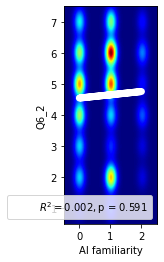

<Figure size 432x288 with 0 Axes>

In [37]:
ai_familiartity2number = {'unfamiliar': 0.0, 'familiar':1.0,  'very familiar':2.0}

for question in ['Q5_2','Q6_2','Q7_2','Q8_2','Q9_2','Q10_2']:
    # convert ai familarity to number
    x = np.asarray([ai_familiartity2number[value] for value in  df_number['ai_familiarity']])
    y = df_number[question]
        
    # linear regression
    fit = stats.linregress(x, y)    
    plt.plot(x,fit.intercept + fit.slope*x,label=f'$R^2 = {np.round(fit.rvalue**2,3)},$p = {np.round(fit.pvalue,3)}', color='white', linewidth=7.0)
    
    # get heatmap, add values to extend the graph (visual only)
    y = np.concatenate([df_number[question],[-0.9,7.9]])
    x = np.concatenate([[ai_familiartity2number[value] for value in  df_number['ai_familiarity']],[-0.9,2.9]])
    img, extent = hf.heatmap(x, y, s=32)
    plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
    
    plt.ylim(0.5,7.5)
    plt.xlim(-0.5,2.5)
    plt.legend(loc='lower right')
    plt.ylabel(question)
    plt.xlabel('AI familiarity')
    plt.savefig(question+"ai_fit.png", dpi=600)
    plt.show()
    plt.clf()

#### Jitter

In [32]:
ai_familiartity2number = {'unfamiliar': 0.0, 'familiar':1.0,  'geek':2.0}

for question in ['Q5_2','Q6_2','Q7_2','Q8_2','Q9_2','Q10_2']:
    # convert ai familarity to number
    x = np.asarray([ai_familiartity2number[value] for value in  df_number['ai_familiarity']])
    y = np.asarray(df_number[question])
    
    # linear regression
    fit = stats.linregress(x, y)    
    plt.plot(x,fit.intercept + fit.slope*x,label=f'$R^2 = {np.round(fit.rvalue**2,3)},$p = {np.round(fit.pvalue,3)}', color='red', linewidth=2.0)

    x,y = hf.addjitter(x,y,0.35)
    plt.scatter(x,y,s=3, color='black')

    plt.ylim(0.5,7.5)
    plt.xlim(-0.5,2.5)
    plt.legend(loc='lower right')
    plt.ylabel(question)
    plt.xlabel('AI familiarity')
    plt.savefig(question+"ai_jitter_fit.png", dpi=600)
    plt.show()
    plt.clf()



KeyError: 'very familar'

#### All questions combined

##### Heat map

In [33]:
ai_familiartity2number = {'unfamiliar': 0.0, 'familiar':1.0,  'very familiar':2.0}

all_2 =[]
all_ai_familiarity = []
for question in ['Q5_2','Q6_2','Q7_2','Q8_2','Q9_2','Q10_2']:
    all_2 = np.concatenate([all_2,df_number[question]])
    all_ai_familiarity = np.concatenate([all_ai_familiarity,df_number['ai_familiarity']])

x = np.asarray([ai_familiartity2number[value] for value in  all_ai_familiarity])
y = all_2

# linear regression
fit = stats.linregress(x, y)    
plt.plot(x,fit.intercept + fit.slope*x,label=f'$R^2 = {np.round(fit.rvalue**2,3)},$p = {np.round(fit.pvalue,3)}', color='white', linewidth=7.0)

# get heatmap, add values to extend the graph (visual only)
y = np.concatenate([all_2,[-0.9,7.9]])
x = np.concatenate([np.asarray([ai_familiartity2number[value] for value in  all_ai_familiarity]),[-0.9,2.9]])
img, extent = hf.heatmap(x, y, s=32)
plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet)

plt.ylim(0.5,7.5)
plt.xlim(-0.5,2.5)
plt.legend(loc='lower right')
plt.ylabel('_2 questions')
plt.xlabel('AI familiarity')
plt.savefig("all_ai_fit.png", dpi=600)
plt.show()
plt.clf()

KeyError: 'very familar'

##### Jitter

In [38]:
ai_familiartity2number = {'unfamiliar': 0.0, 'familiar':1.0,  'very familiar':2.0}

all_2 =[]
all_ai_familiarity = []
for question in ['Q5_2','Q6_2','Q7_2','Q8_2','Q9_2','Q10_2']:
    all_2 = np.concatenate([all_2,df_number[question]])
    all_ai_familiarity = np.concatenate([all_ai_familiarity,df_number['ai_familiarity']])

x = np.asarray([ai_familiartity2number[value] for value in  all_ai_familiarity])
y = all_2

# linear regression
fit = stats.linregress(x, y)    
plt.plot(x,fit.intercept + fit.slope*x,label=f'$R^2 = {np.round(fit.rvalue**2,3)},$p = {np.round(fit.pvalue,3)}', color='red', linewidth=2.0)

x,y = hf.addjitter(x,y,0.35)
plt.scatter(x,y,s=3, color='black')

plt.ylim(0.5,7.5)
plt.xlim(-0.5,2.5)
plt.legend(loc='lower right')
plt.ylabel('_2 questions')
plt.xlabel('AI familiarity')
plt.savefig("all_ai_jitter_fit.png", dpi=600)
plt.show()
plt.clf()

<Figure size 432x288 with 0 Axes>

# Creating plots of the demographics of all respondends

## Country of residence

In [39]:
country_counts = df_text['Q25'].value_counts()
country_dic = {}
for country in country_counts.keys():
    country_dic[country] = [country_counts[country]]
countries = hf.plot_country_distribution(country_dic)
plt.savefig("country.png", dpi=600)

<Figure size 432x288 with 0 Axes>

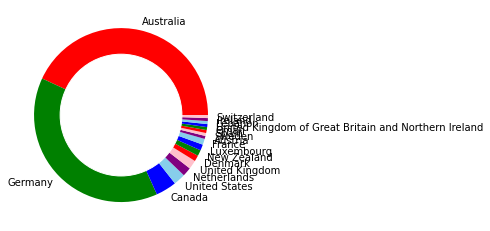

In [40]:
name, number = hf.get_distribution_from_question('Q25', df_text)
hf.doghnut_plot(name, number)

## Age

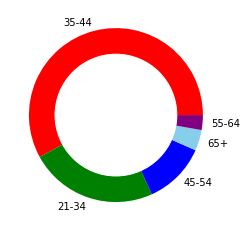

In [41]:
name, number = hf.get_distribution_from_question('Q24', df_text)
hf.doghnut_plot(name, number)
plt.savefig("age.png", dpi=600)

## Education

In [42]:
name, number = hf.get_distribution_from_question('Q26', df_text)
hf.doghnut_plot(name, number)
plt.savefig("education.png", dpi=600)

## Employement

In [43]:
name, number = hf.get_distribution_from_question('Q27', df_text)
hf.doghnut_plot(name, number) 
plt.savefig("employement.png", dpi=600)

## Salary

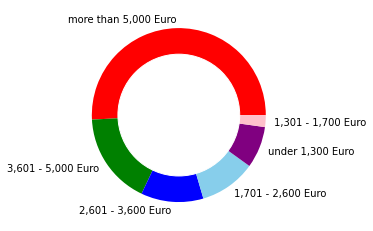

In [44]:
name, number = hf.get_distribution_from_question('Q28', df_text)
hf.doghnut_plot(name, number)
plt.savefig("salary.png", dpi=600)

# Looking at the demographics of people that accept AI more than human

Choosing only the respondends where the delta was smaller than -2, indicating that the respondend accepts AI decision making more than human decision making.

In [45]:
delta_options = [-7,-6,-5,-4,-3,-2]
ai_user_dic = {}
for question in ['Q5_delta','Q6_delta','Q7_delta','Q8_delta','Q9_delta','Q10_delta']:
    ai_user_dic[question] = hf.get_subset(df_number, [(question, delta_options)]) 
    print(f"{question} has {len(ai_user_dic[question])} respondendes tending towards to AI")

Q5_delta has 9 respondendes tending towards to AI
Q6_delta has 15 respondendes tending towards to AI
Q7_delta has 27 respondendes tending towards to AI
Q8_delta has 12 respondendes tending towards to AI
Q9_delta has 31 respondendes tending towards to AI
Q10_delta has 15 respondendes tending towards to AI


In [46]:
ai_users_text = pd.concat([ai_user_dic['Q5_delta'],ai_user_dic['Q7_delta'],ai_user_dic['Q9_delta']]).drop_duplicates()

## Salary

In [47]:
name, number = hf.get_distribution_from_question('Q28', ai_users_text)
hf.doghnut_plot(name, number)
plt.savefig("salary_ai_affine.png", dpi=600)

## Emlpoyement

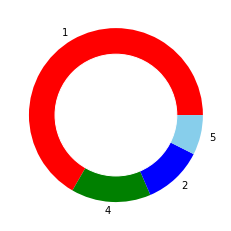

In [48]:
name, number = hf.get_distribution_from_question('Q27', ai_users_text)
hf.doghnut_plot(name, number) 
plt.savefig("employment_ai_affine.png", dpi=600)


## Education

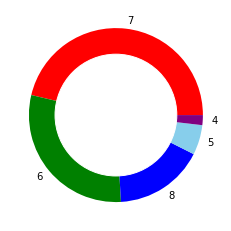

In [49]:
name, number = hf.get_distribution_from_question('Q26', ai_users_text)
hf.doghnut_plot(name, number)
plt.savefig("education_ai_affine.png", dpi=600)

## Country of residence

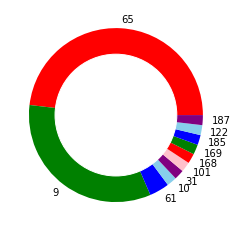

In [50]:
name, number = hf.get_distribution_from_question('Q25', ai_users_text)
hf.doghnut_plot(name, number)
plt.savefig("country_ai_affine.png", dpi=600)

## Age

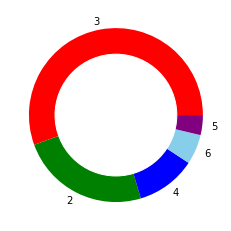

In [51]:
name, number = hf.get_distribution_from_question('Q24', ai_users_text)
hf.doghnut_plot(name, number)
plt.savefig("age_ai_affine.png", dpi=600)

# Looking at the demographics and the delta

Creating plots to see if there is a correlation between the delta and the demographics

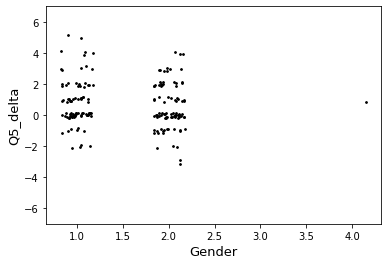

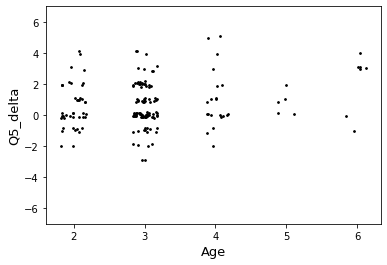

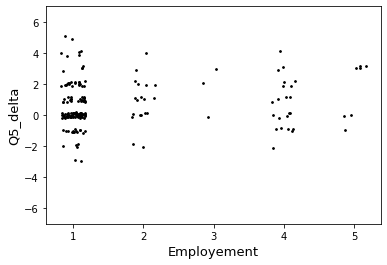

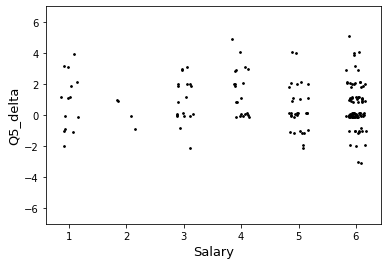

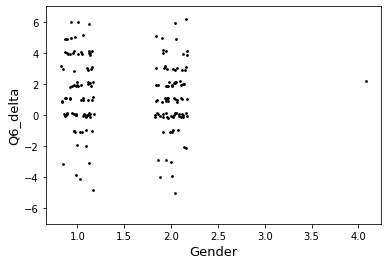

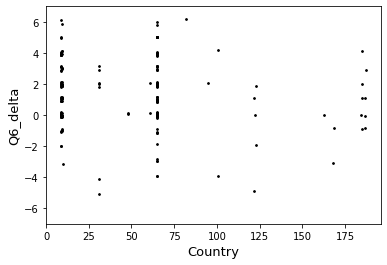

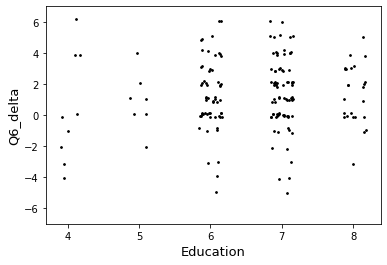

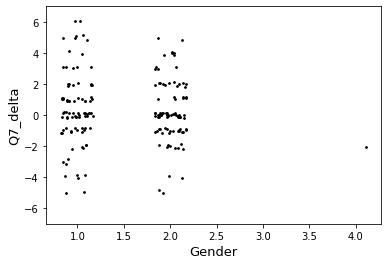

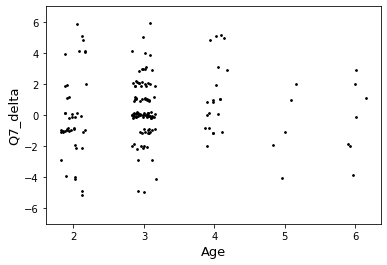

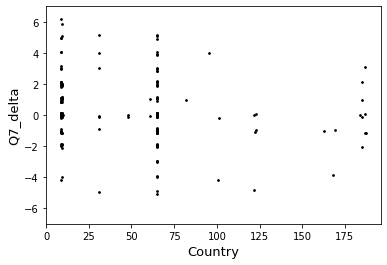

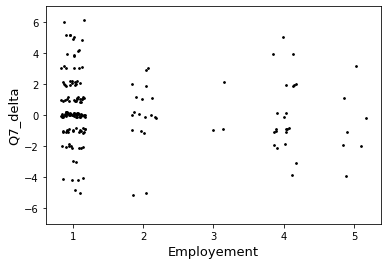

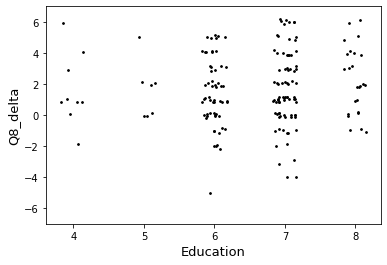

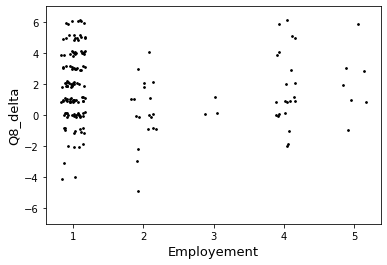

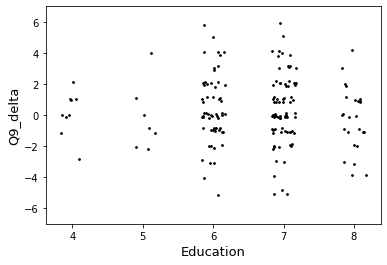

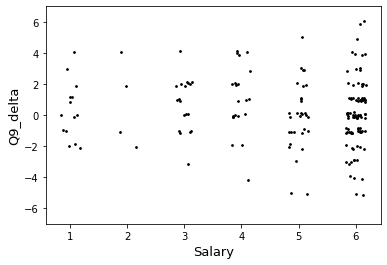

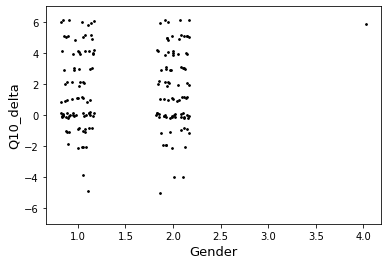

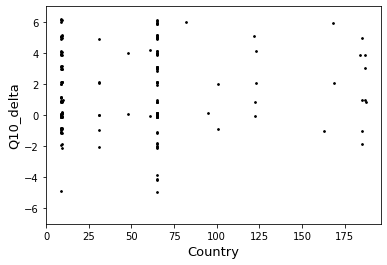

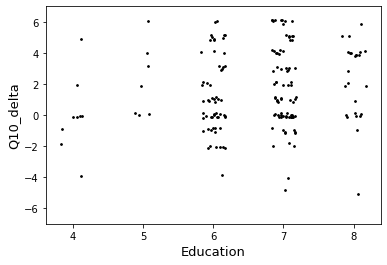

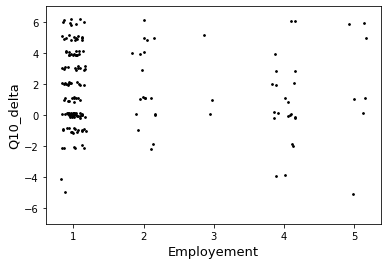

<Figure size 432x288 with 0 Axes>

In [52]:
question2demographics = {'Q23': 'Gender','Q25': 'Country','Q24': 'Age','Q26': 'Education','Q27': 'Employement','Q28': 'Salary'}

for question in ['Q5_delta','Q6_delta','Q7_delta','Q8_delta','Q9_delta','Q10_delta']:
    for demographic in ['Q23','Q24','Q25','Q26','Q27','Q28']:
        x = np.asarray(df_number[demographic])
        y = np.asarray(df_number[question])
        x,y = hf.addjitter(x,y,0.35)
        plt.scatter(x,y,s=3, color='black')

        plt.ylim(-7,7)
        plt.ylabel(question, fontsize=13)
        plt.xlabel(question2demographics[demographic], fontsize=13)
        plt.savefig(question+'_'+question2demographics[demographic]+"_jitter.png", dpi=600)
        plt.show()
        plt.clf()


# Plotting all distributions of all questions for all respondends

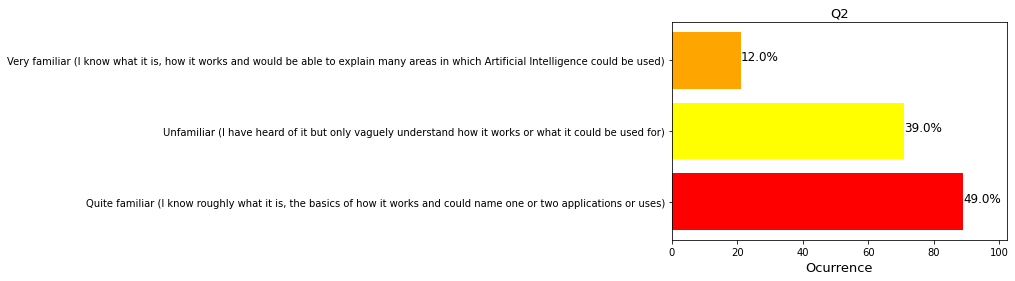

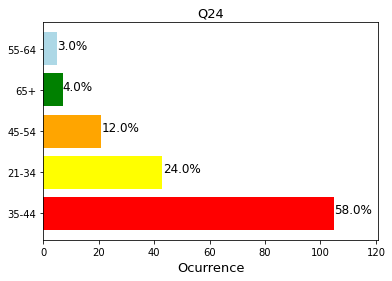

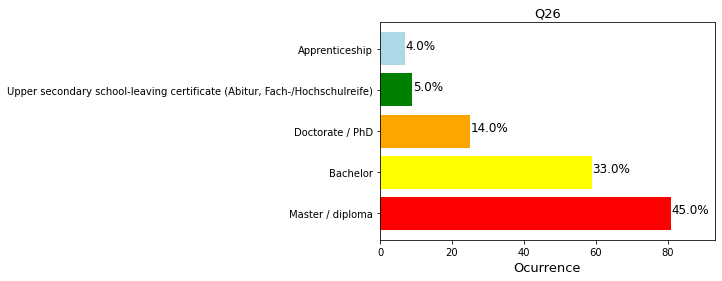

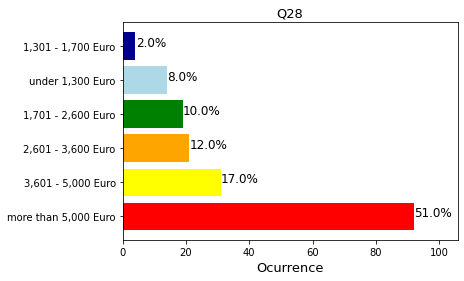

<Figure size 432x288 with 0 Axes>

In [53]:
color_list = ['red', 'yellow', 'orange', 'green', 'lightblue', 'darkblue','purple']

for question in ['Q2', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28']:
    options, occurrence = hf.get_distribution_from_question(question, df_text)

    plt.barh(options, occurrence, color = color_list[:len(options)])
    for i in range(0,len(options)):
        plt.text(y = i , x = occurrence[i]+0.1, s = str(np.round(occurrence[i]/181*100,0))+'%', size = 12)
    plt.xlim(0,np.max(occurrence)+np.max(occurrence)*0.15)
    plt.title(question, fontsize=13)
    plt.xlabel('Ocurrence',fontsize=13)
    plt.savefig(question + "answers_distribution.png", dpi=600, bbox_inches='tight')
    plt.show()
    plt.clf()

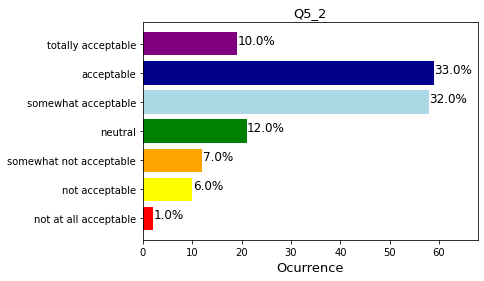

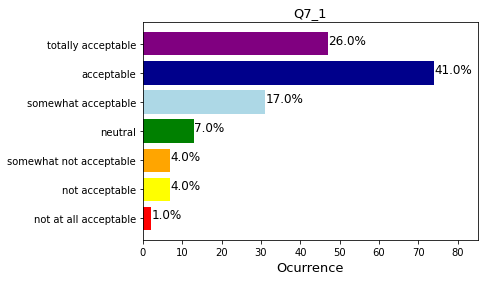

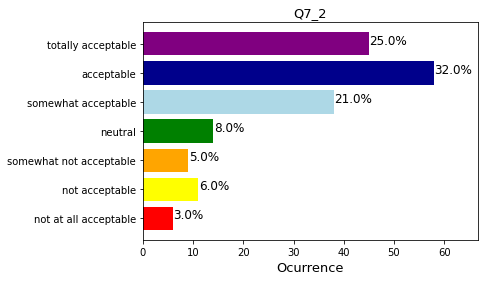

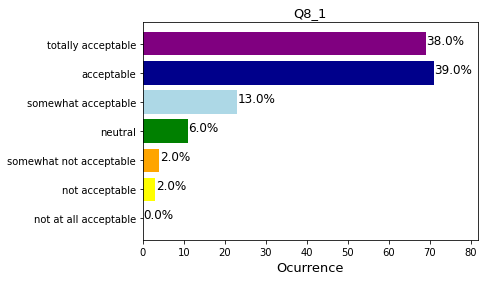

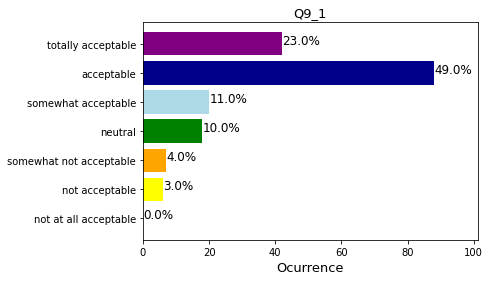

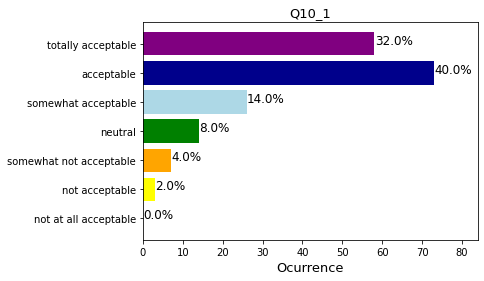

<Figure size 432x288 with 0 Axes>

In [54]:
color_list = ['red', 'yellow', 'orange', 'green', 'lightblue', 'darkblue','purple']
answers = ['not at all acceptable','not acceptable','somewhat not acceptable','neutral','somewhat acceptable','acceptable','totally acceptable']

for question in ['Q5_1', 'Q5_2', 'Q6_1', 'Q6_2', 'Q7_1','Q7_2', 'Q8_1', 'Q8_2', 'Q9_1', 'Q9_2', 'Q10_1', 'Q10_2']:
    
    distribution = df_text[question].value_counts()
    x = []
    y = []
    for answer in answers:
        if answer in distribution.keys():
            y.append(distribution[answer])
            x.append(answer)
        else:
            y.append(0)
            x.append(answer)
    plt.barh(x, y, color = color_list[:len(x)])
    for i in range(0,len(x)):
        plt.text(y = i , x = y[i]+0.1, s = str(np.round(y[i]/181*100,0))+'%', size = 12)
    plt.xlim(0,np.max(y)+np.max(y)*0.15)
    plt.title(question, fontsize=13)
    plt.xlabel('Ocurrence',fontsize=13)
    plt.savefig(question + "answers_distribution.png", dpi=600, bbox_inches='tight')
    plt.show()
    plt.clf()

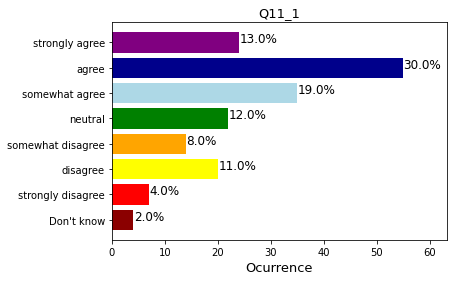

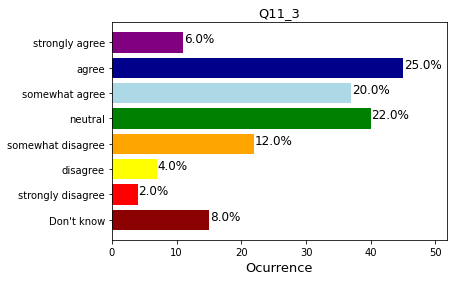

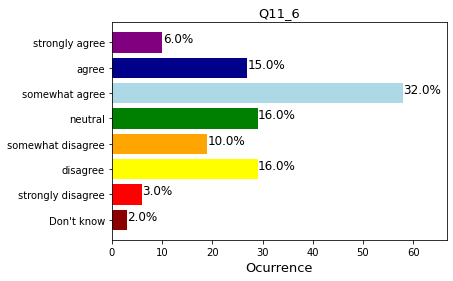

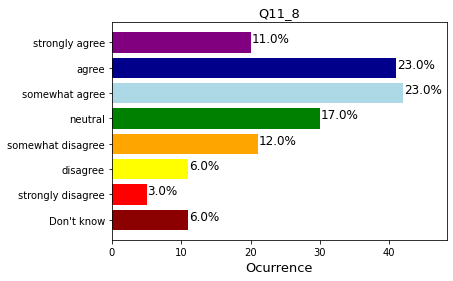

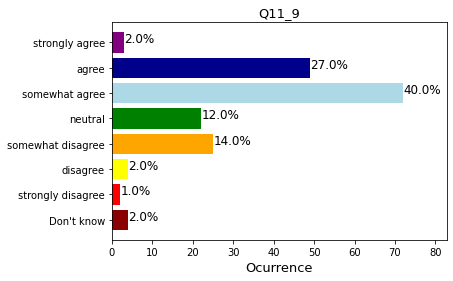

<Figure size 432x288 with 0 Axes>

In [55]:
color_list = ['darkred','red', 'yellow', 'orange', 'green', 'lightblue', 'darkblue','purple']
answers = ["Don't know", 'strongly disagree','disagree','somewhat disagree','neutral','somewhat agree','agree','strongly agree']

for question in ['Q11_1','Q11_2', 'Q11_3', 'Q11_4', 'Q11_5', 'Q11_6', 'Q11_7', 'Q11_8', 'Q11_9']:
    
    distribution = df_text[question].value_counts()
    x = []
    y = []
    for answer in answers:
        if answer in distribution.keys():
            y.append(distribution[answer])
            x.append(answer)
        else:
            y.append(0)
            x.append(answer)
    plt.barh(x, y, color = color_list[:len(x)])
    for i in range(0,len(x)):
        plt.text(y = i , x = y[i]+0.1, s = str(np.round(y[i]/181*100,0))+'%', size = 12)
    plt.xlim(0,np.max(y)+np.max(y)*0.15)
    plt.title(question, fontsize=13)
    plt.xlabel('Ocurrence',fontsize=13)
    plt.savefig(question + "answers_distribution.png", dpi=600, bbox_inches='tight')
    plt.show()
    plt.clf()

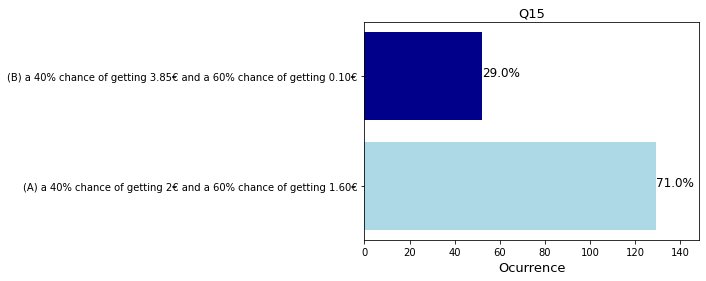

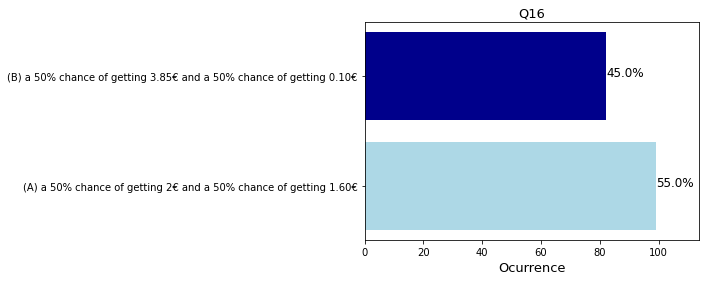

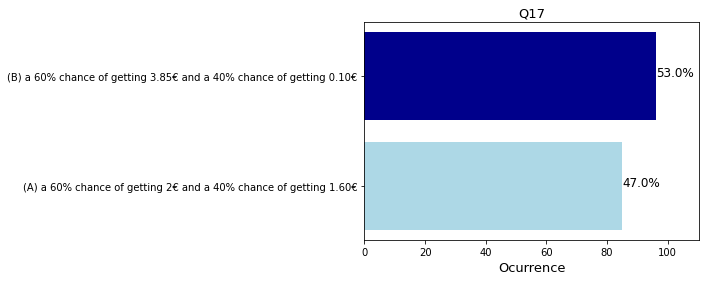

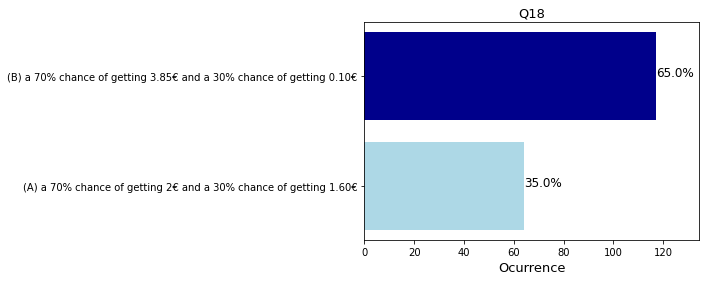

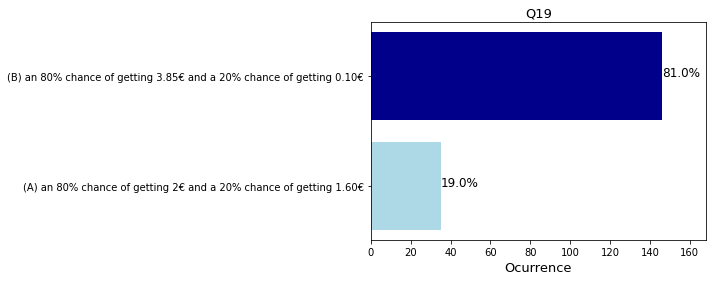

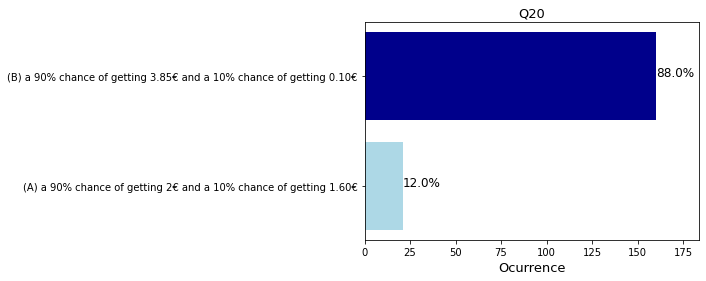

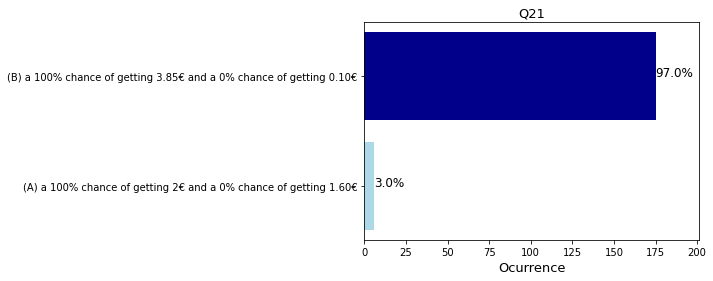

<Figure size 432x288 with 0 Axes>

In [56]:
color_list = ['lightblue', 'darkblue']

for question in ['Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21']:
    
    distribution = df_text[question].value_counts()
    x = []
    y = []
    if distribution.keys()[0][:3] == '(A)':
        y.append(distribution[distribution.keys()[0]])
        x.append(distribution.keys()[0])
        y.append(distribution[distribution.keys()[1]])
        x.append(distribution.keys()[1])
    else:
        y.append(distribution[distribution.keys()[1]])
        x.append(distribution.keys()[1])
        y.append(distribution[distribution.keys()[0]])
        x.append(distribution.keys()[0])
    plt.barh(x, y, color = color_list[:len(x)])
    for i in range(0,len(x)):
        plt.text(y = i , x = y[i]+0.1, s = str(np.round(y[i]/181*100,0))+'%', size = 12)
    plt.xlim(0,np.max(y)+np.max(y)*0.15)
    plt.title(question, fontsize=13)
    plt.xlabel('Ocurrence',fontsize=13)
    plt.savefig(question + "answers_distribution.png", dpi=600, bbox_inches='tight')
    plt.show()
    plt.clf()